Importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics


Data collection and analysis

In [3]:
df = pd.read_csv('/content/Train.csv')

In [4]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.shape

(8523, 12)

In [6]:
df['Quantity'] = df['Item_Outlet_Sales'] / df['Item_MRP']

print(df.head(3))


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   
2           FDN15        17.50          Low Fat         0.016760         Meat   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales   Quantity  
0               Tier 1  Supermarket Type1          3735.1380  14.951963  
1               Tier 3  Supermarket Type2           443.4228   9.186454  
2               Tier 1  Supermarket Type1          2097.2700  14.809346  


In [7]:
position_to_insert = 5

df.insert(position_to_insert, 'Quantity', df.pop('Quantity'))

print(df.head(3))


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   
2           FDN15        17.50          Low Fat         0.016760         Meat   

    Quantity  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0  14.951963  249.8092            OUT049                       1999   
1   9.186454   48.2692            OUT018                       2009   
2  14.809346  141.6180            OUT049                       1999   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1          3735.1380  
1      Medium               Tier 3  Supermarket Type2           443.4228  
2      Medium               Tier 1  Supermarket Type1          2097.2700  


In [8]:
df['Quantity'] = df['Quantity'].round().astype(int)

print(df.head(3))


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   
2           FDN15        17.50          Low Fat         0.016760         Meat   

   Quantity  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
0        15  249.8092            OUT049                       1999   
1         9   48.2692            OUT018                       2009   
2        15  141.6180            OUT049                       1999   

  Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0      Medium               Tier 1  Supermarket Type1          3735.1380  
1      Medium               Tier 3  Supermarket Type2           443.4228  
2      Medium               Tier 1  Supermarket Type1          2097.2700  


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Quantity                   8523 non-null   int64  
 6   Item_MRP                   8523 non-null   float64
 7   Outlet_Identifier          8523 non-null   object 
 8   Outlet_Establishment_Year  8523 non-null   int64  
 9   Outlet_Size                6113 non-null   object 
 10  Outlet_Location_Type       8523 non-null   object 
 11  Outlet_Type                8523 non-null   object 
 12  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

In [10]:
#checking for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Quantity                        0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#handling missing values
df['Item_Weight'].mean()

12.857645184135976

In [12]:
#filling the missing values of 'item_weight' column with mean value
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Quantity                        0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
#replacing missing values in 'Outlet_Size' with mode
mode_of_Outlet_Size = df.pivot_table( values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [15]:
print(mode_of_Outlet_Size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [16]:
missing_values = df['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


true represents a particular value is missing


In [17]:
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_Size[x])

In [18]:
missing_values = df['Outlet_Size'].isnull()
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [19]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Quantity                     0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

DATA ANALYSIS

In [20]:
#STATS
df.describe()

,Item_Weight,Item_Visibility,Quantity,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,15.424850,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,9.190713,62.275067,8.371760,1706.499616
min,4.555000,0.000000,1.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,9.000000,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,15.000000,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,21.000000,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,57.000000,266.888400,2009.000000,13086.964800


NUMERICAL FEATURES

In [21]:
sns.set()

<ipython-input-22-a33e7fd05c52>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Weight'])


<function matplotlib.pyplot.show(close=None, block=None)>

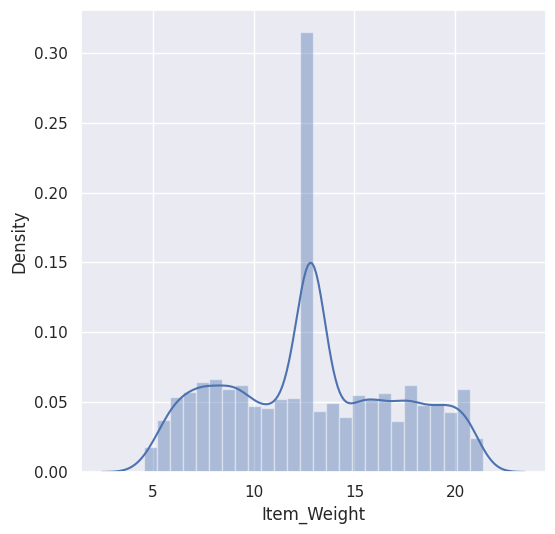

In [22]:
#item_weight distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show

<ipython-input-23-f6f001948988>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Visibility'])


<function matplotlib.pyplot.show(close=None, block=None)>

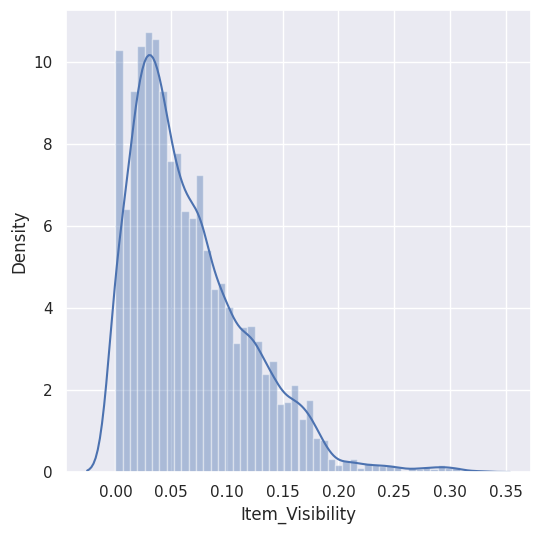

In [23]:
#Item_Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show

<ipython-input-24-9793122378a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_MRP'])


<function matplotlib.pyplot.show(close=None, block=None)>

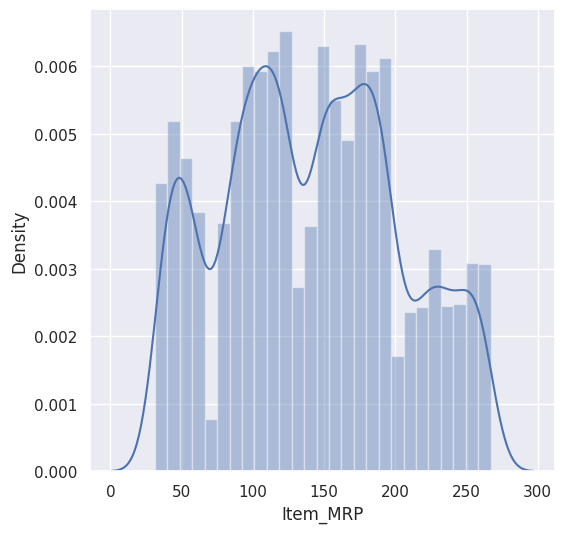

In [24]:
#Item_MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show

<ipython-input-25-f87b064d23dd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Item_Outlet_Sales'])


<function matplotlib.pyplot.show(close=None, block=None)>

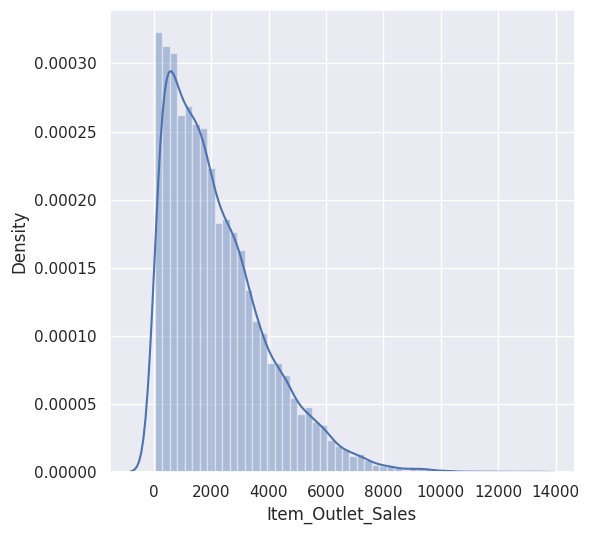

In [25]:
#Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Outlet_Sales'])
plt.show

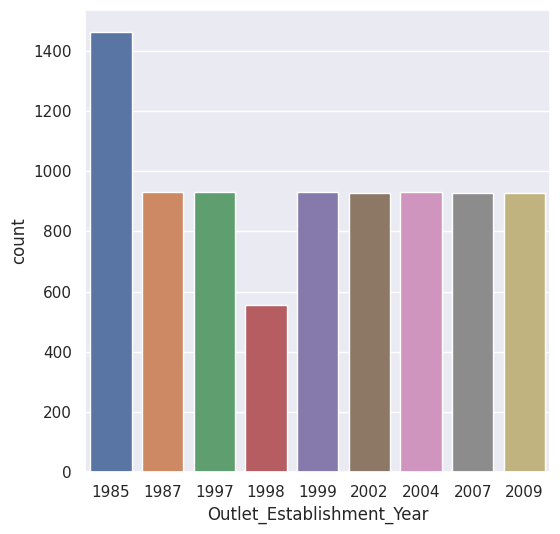

In [26]:
# Outlet_Establishment_Year column plot
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data = df)
plt.show()


CATEGORICAL FEATURES

In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [28]:
df.replace({'Item_Fat_Content': {'LF' : 'Low Fat', 'low fat': 'Low Fat', 'reg' : 'Regular'}}, inplace = True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

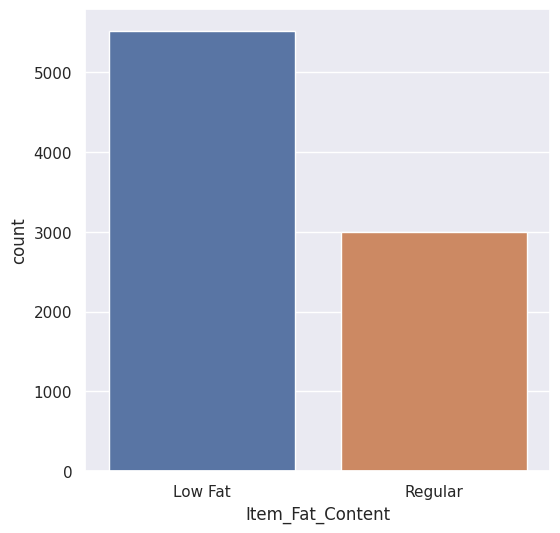

In [29]:
#Item_Fat_Content column plot
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data = df)
plt.show()


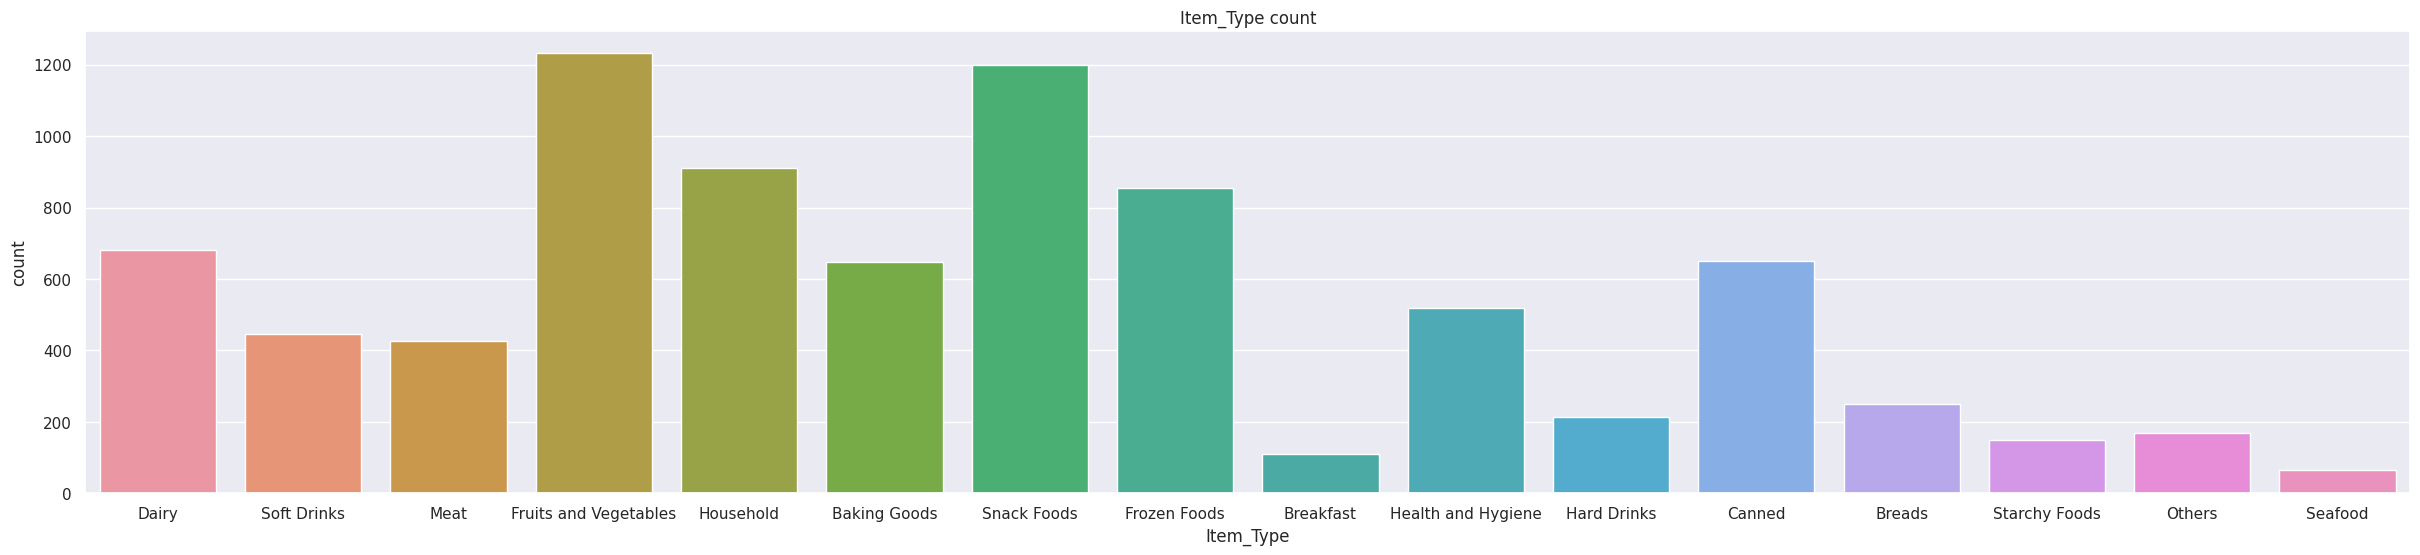

In [30]:
#Item_Type column plot
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data = df)
plt.title('Item_Type count')
plt.show()


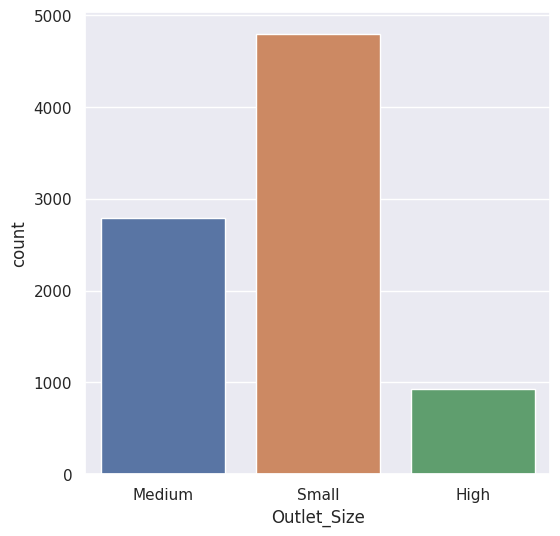

In [31]:
#  Outlet_Size column
df.loc[missing_values,'Outlet_Size'] = df.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=  df)
plt.show()



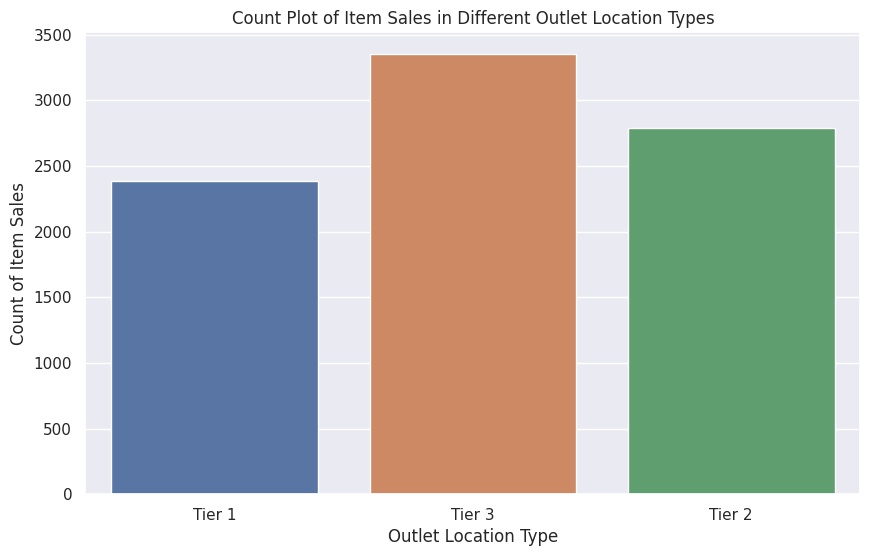

In [32]:
# Assuming 'Outlet_Location_Type' is the column containing location types
plt.figure(figsize=(10, 6))
sns.countplot(x='Outlet_Location_Type', data=df)
plt.title('Count Plot of Item Sales in Different Outlet Location Types')
plt.xlabel('Outlet Location Type')
plt.ylabel('Count of Item Sales')
plt.show()


DATA PREPROCESSING

In [33]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [34]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

ANALYSIS OF ITEM TYPE AT DIFFERENT OUTLET

ANALYTICAL PLOTS

1. Dairy

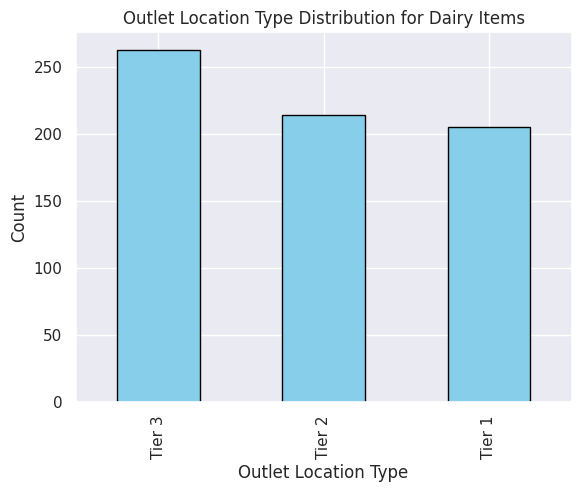

In [35]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Dairy"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Dairy Items')

# Display the plot
plt.show()


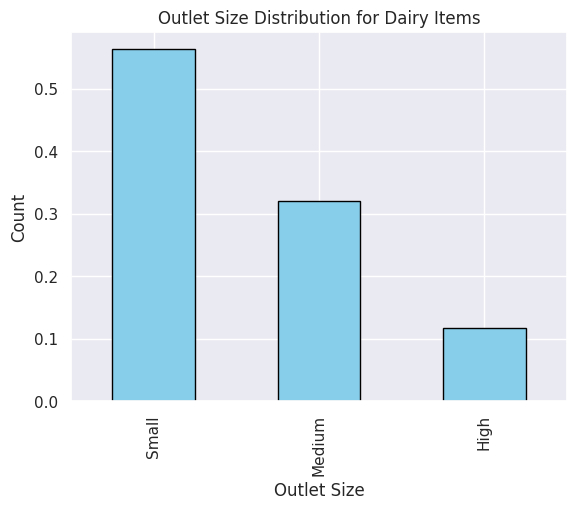

In [36]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Dairy"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Dairy Items')

# Display the plot
plt.show()

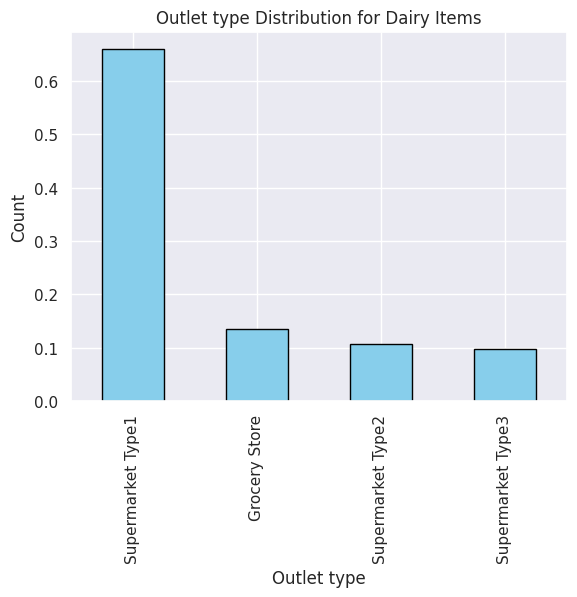

In [37]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Dairy"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Dairy Items')

# Display the plot
plt.show()


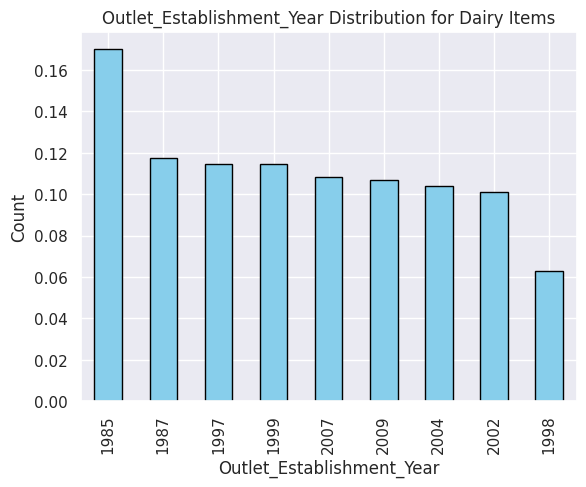

In [38]:
tem_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Dairy"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Dairy Items')

# Display the plot
plt.show()

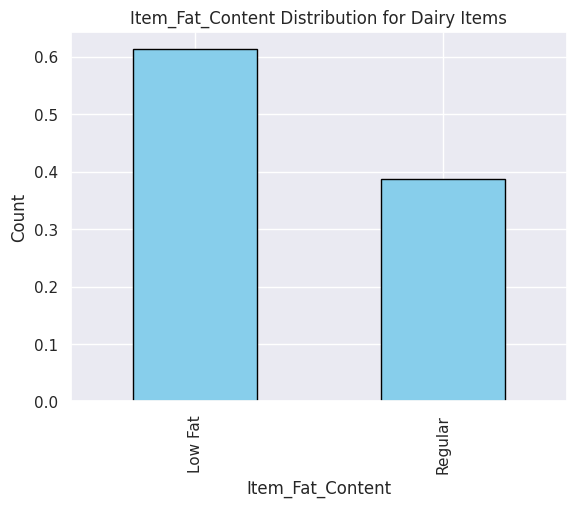

In [39]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Dairy"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Dairy Items')

# Display the plot
plt.show()

2. Soft drinks

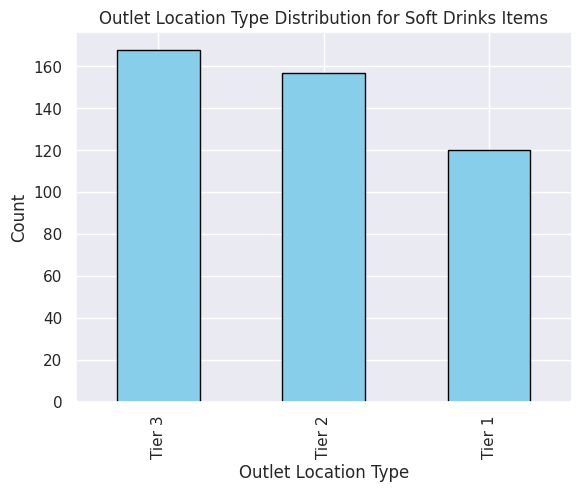

In [40]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Soft Drinks"]

#from this we can interpret that most of the Soft Drinks sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Soft Drinks Items')

# Display the plot
plt.show()


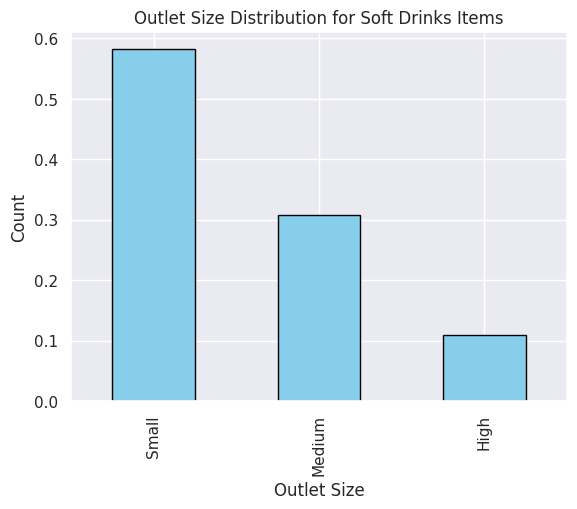

In [41]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Soft Drinks"]

#from this we can interpret that most of the Soft Drinks sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Soft Drinks Items')

# Display the plot
plt.show()

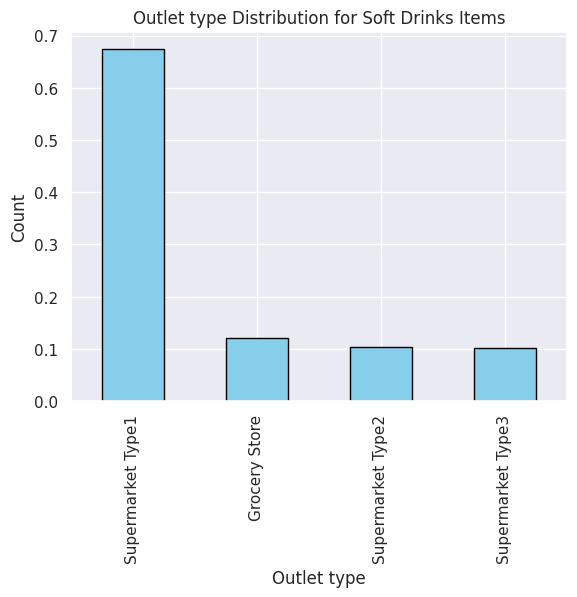

In [42]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Soft Drinks"]

#from this we can interpret that most of the Soft Drinks sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Soft Drinks Items')

# Display the plot
plt.show()

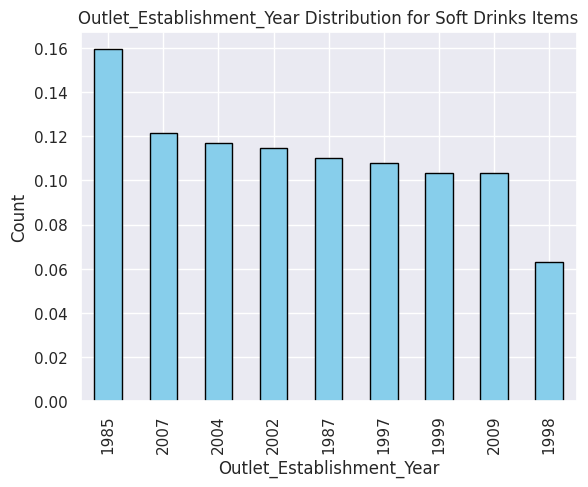

In [43]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Soft Drinks"]

#from this we can interpret that most of the Soft Drinks sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Soft Drinks Items')

# Display the plot
plt.show()

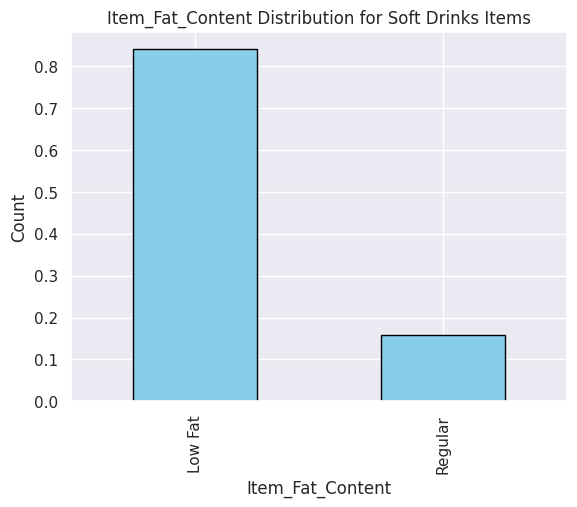

In [44]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Soft Drinks"]

#from this we can interpret that most of the Soft Drinks sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Soft Drinks Items')

# Display the plot
plt.show()

3. Meat

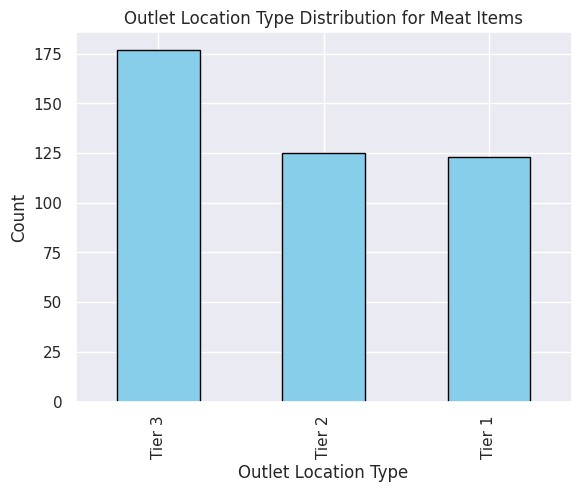

In [45]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Meat"]

#from this we can interpret that most of the Meat sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Meat Items')

# Display the plot
plt.show()

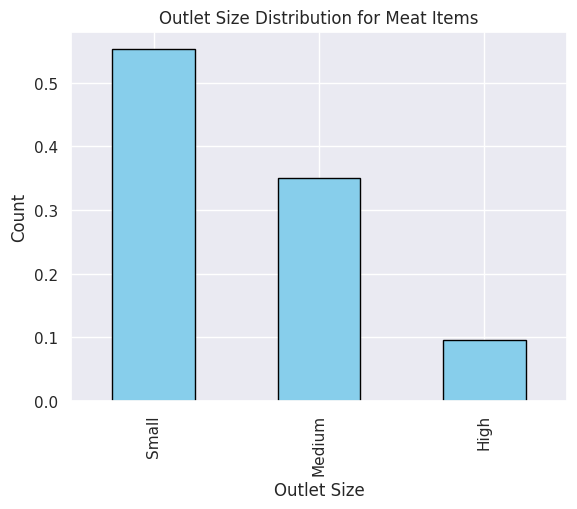

In [46]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Meat"]

#from this we can interpret that most of the meat sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Meat Items')

# Display the plot
plt.show()

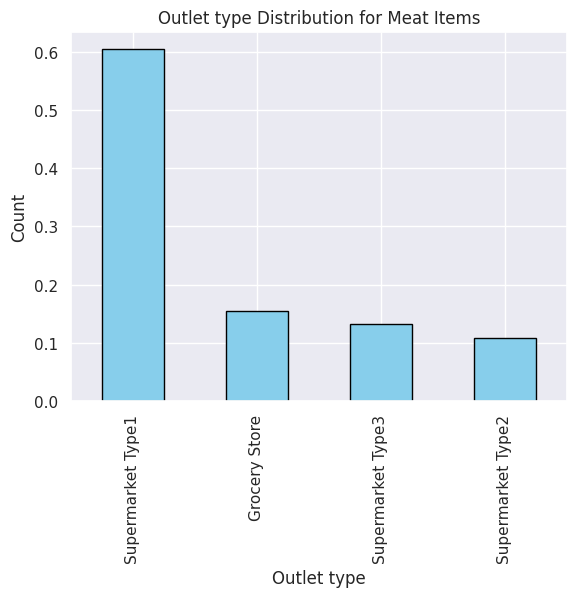

In [47]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Meat"]

#from this we can interpret that most of the meat sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Meat Items')

# Display the plot
plt.show()

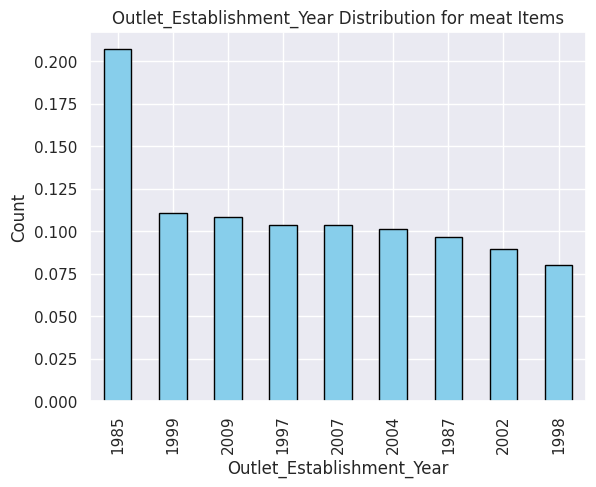

In [48]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Meat"]

#from this we can interpret that most of the meat sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for meat Items')

# Display the plot
plt.show()

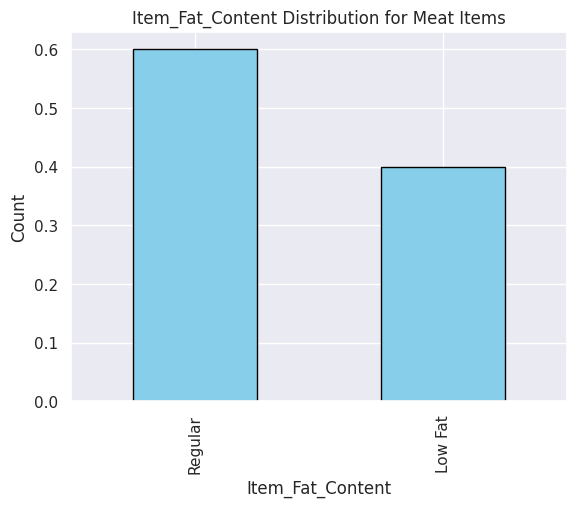

In [49]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Meat"]

#from this we can interpret that most of the meat sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Meat Items')

# Display the plot
plt.show()

4. Fruits and Vegetables

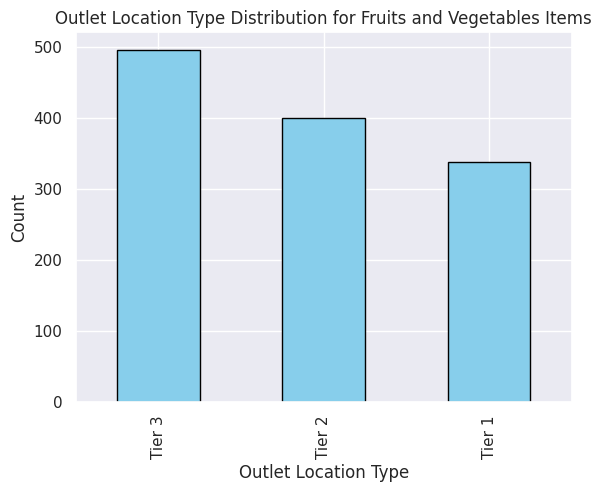

In [50]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Fruits and Vegetables"]

#from this we can interpret that most of the Fruits and Vegetables sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Fruits and Vegetables Items')

# Display the plot
plt.show()

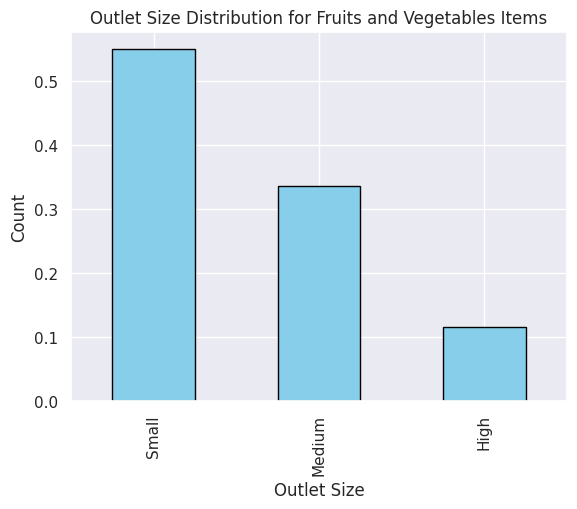

In [51]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Fruits and Vegetables"]

#from this we can interpret that most of the Fruits and Vegetables sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Fruits and Vegetables Items')

# Display the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


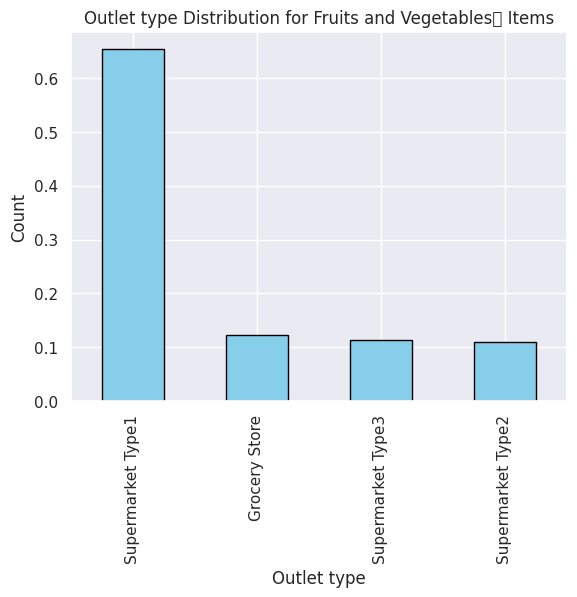

In [52]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Fruits and Vegetables"]

#from this we can interpret that most of the Fruits and Vegetables	 sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Fruits and Vegetables	 Items')

# Display the plot
plt.show()

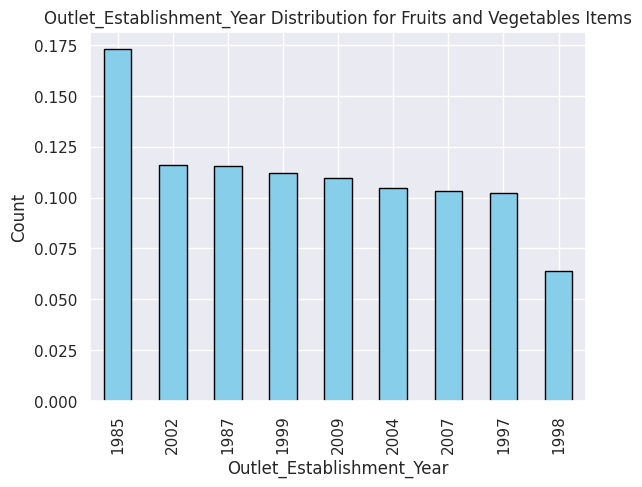

In [53]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Fruits and Vegetables"]

#from this we can interpret that most of the Fruits and Vegetables sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Fruits and Vegetables Items')

# Display the plot
plt.show()

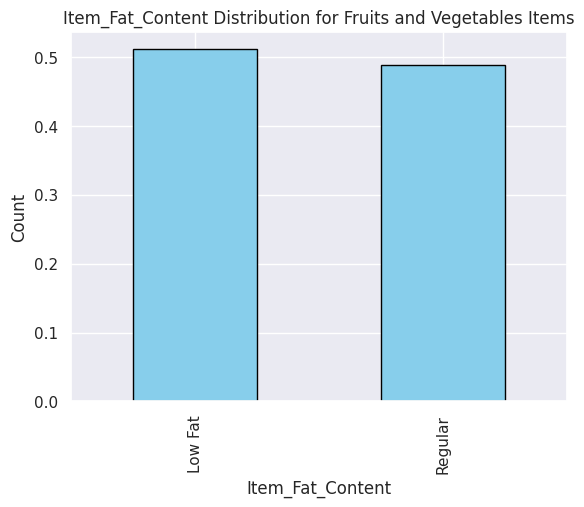

In [54]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Fruits and Vegetables"]

#from this we can interpret that most of the Fruits and Vegetables sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Fruits and Vegetables Items')

# Display the plot
plt.show()

5. Household

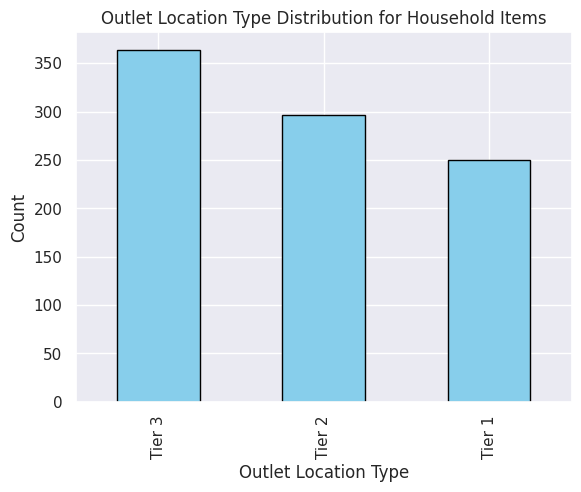

In [55]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Household"]

#from this we can interpret that most of the Household sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Household Items')

# Display the plot
plt.show()

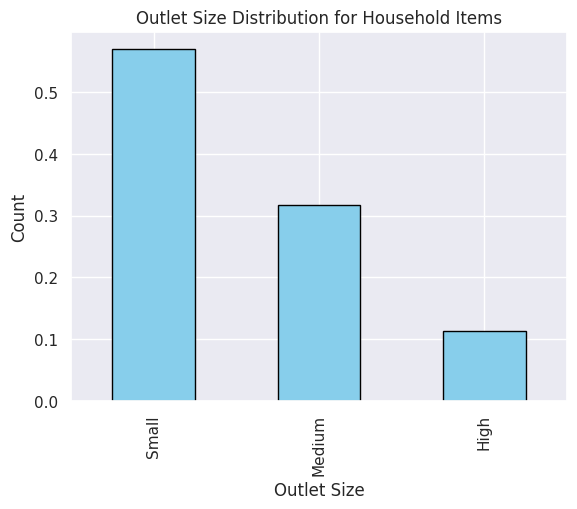

In [56]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Household"]

#from this we can interpret that most of the Household sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Household Items')

# Display the plot
plt.show()

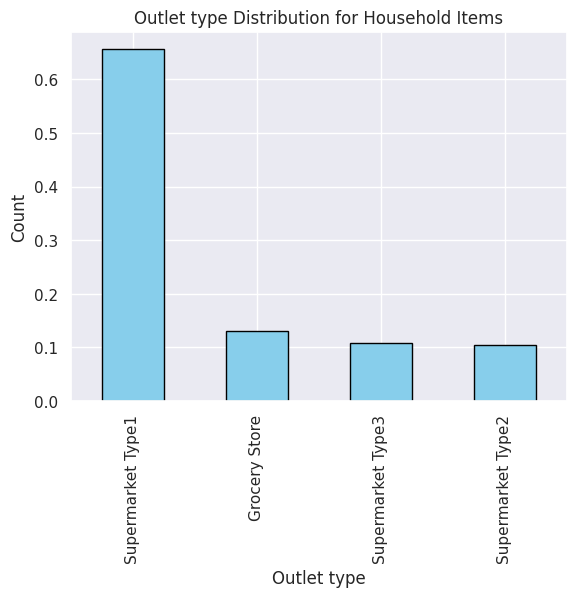

In [57]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Household"]

#from this we can interpret that most of the Household sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Household Items')

# Display the plot
plt.show()

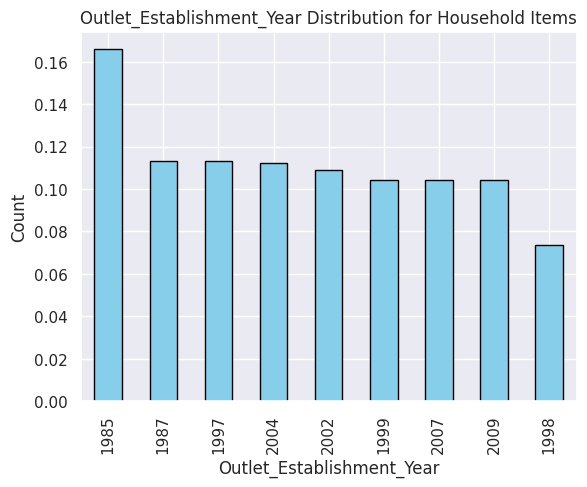

In [58]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Household"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Household Items')

# Display the plot
plt.show()

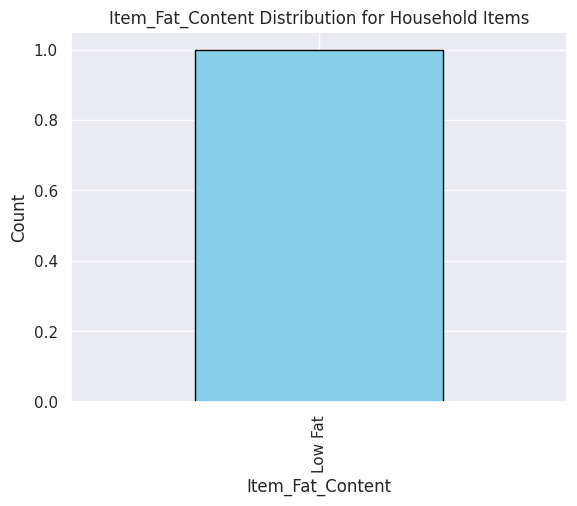

In [59]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Household"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Household Items')

# Display the plot
plt.show()

6. Baking Goods

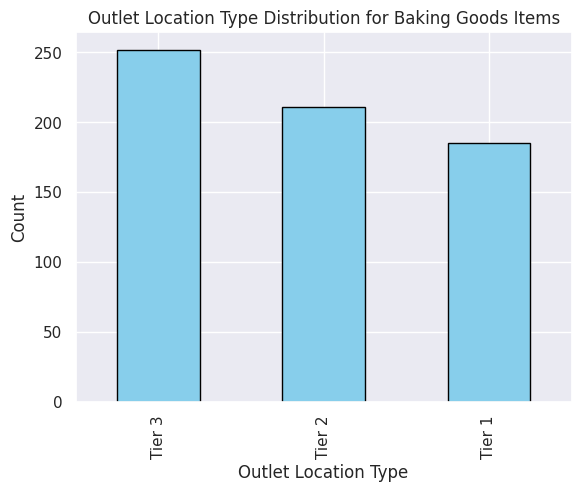

In [60]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Baking Goods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Baking Goods Items')

# Display the plot
plt.show()

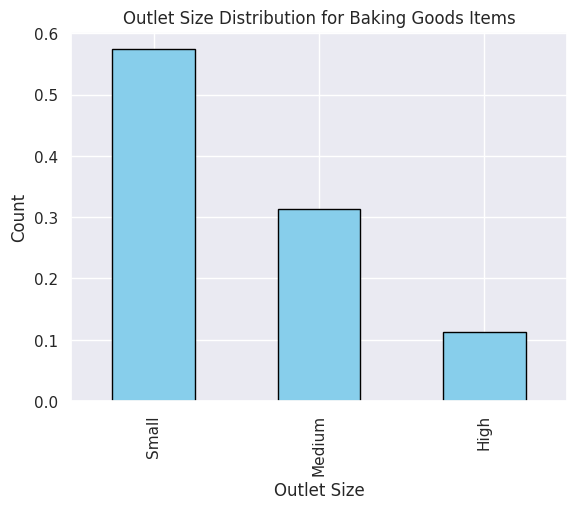

In [61]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Baking Goods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Baking Goods Items')

# Display the plot
plt.show()

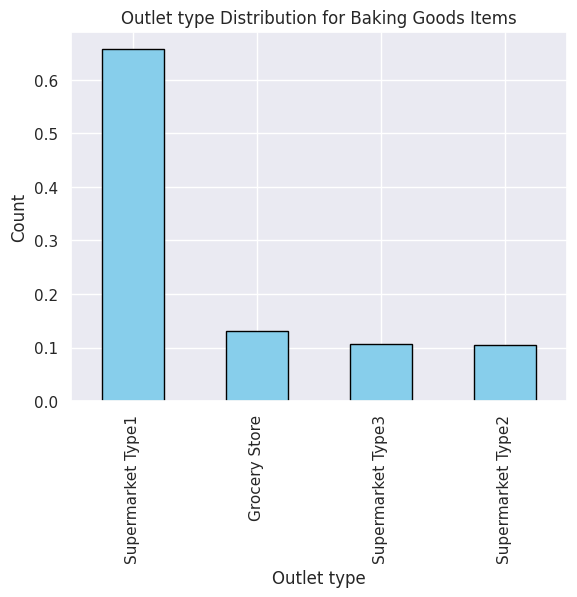

In [62]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Baking Goods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Baking Goods Items')

# Display the plot
plt.show()

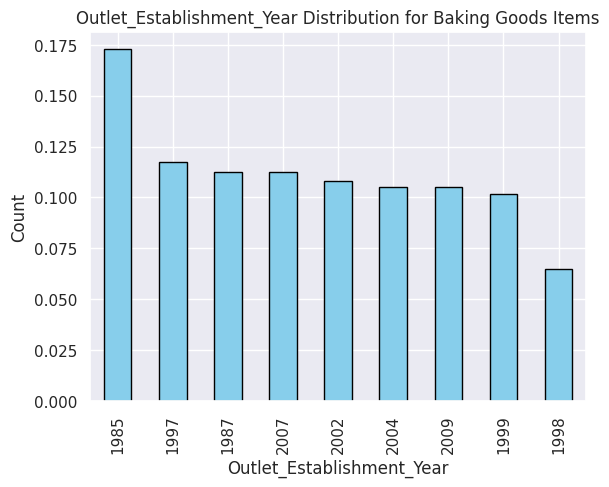

In [63]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Baking Goods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Baking Goods Items')

# Display the plot
plt.show()

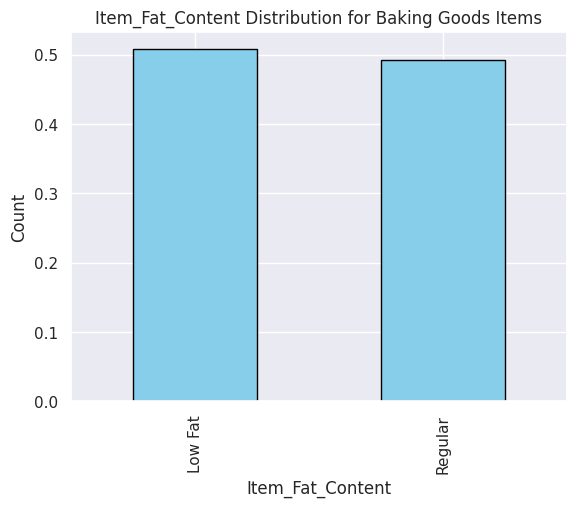

In [64]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Baking Goods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Baking Goods Items')

# Display the plot
plt.show()

7. Snack Foods

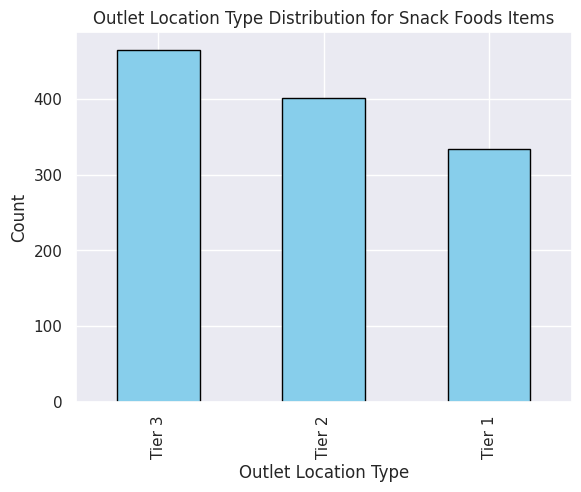

In [65]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Snack Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Snack Foods Items')

# Display the plot
plt.show()

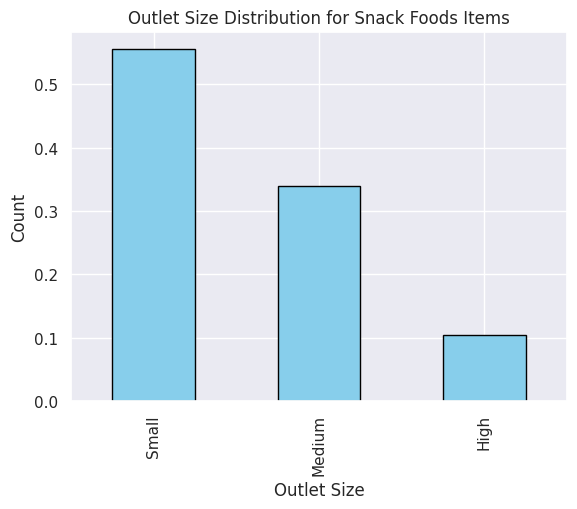

In [66]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Snack Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Snack Foods Items')

# Display the plot
plt.show()

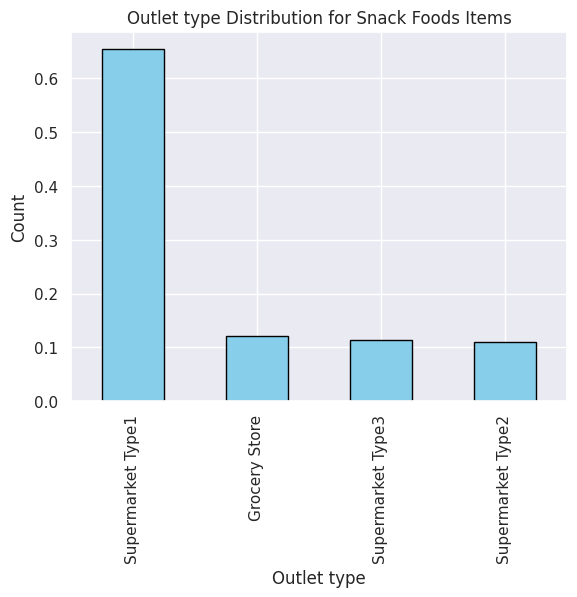

In [67]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Snack Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Snack Foods Items')

# Display the plot
plt.show()

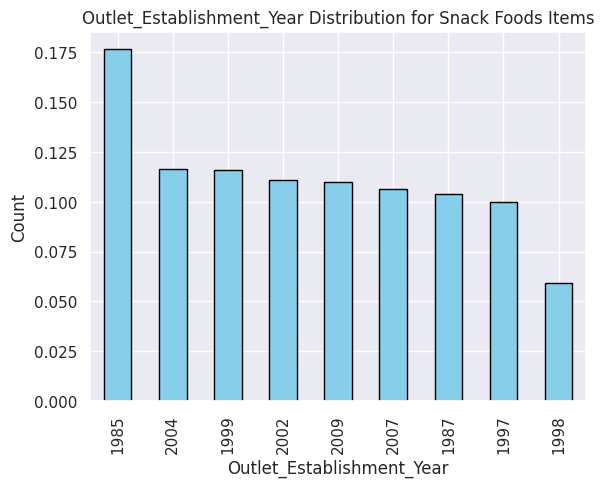

In [68]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Snack Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Snack Foods Items')

# Display the plot
plt.show()

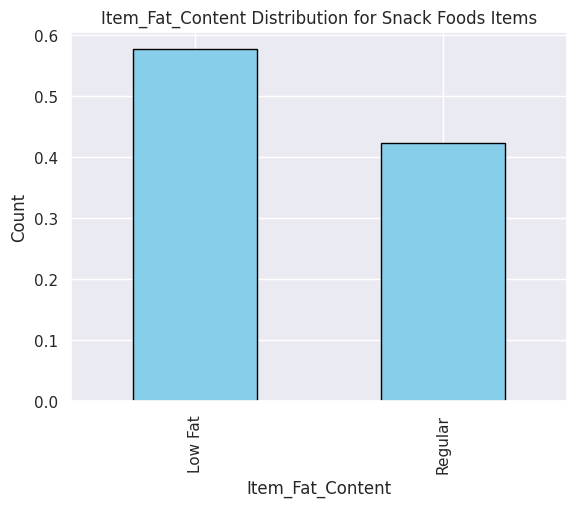

In [69]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Snack Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Snack Foods Items')

# Display the plot
plt.show()

8. Frozen Foods

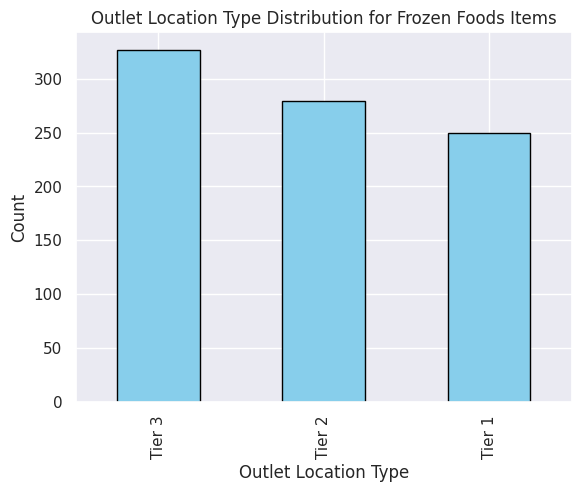

In [70]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Frozen Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Frozen Foods Items')

# Display the plot
plt.show()

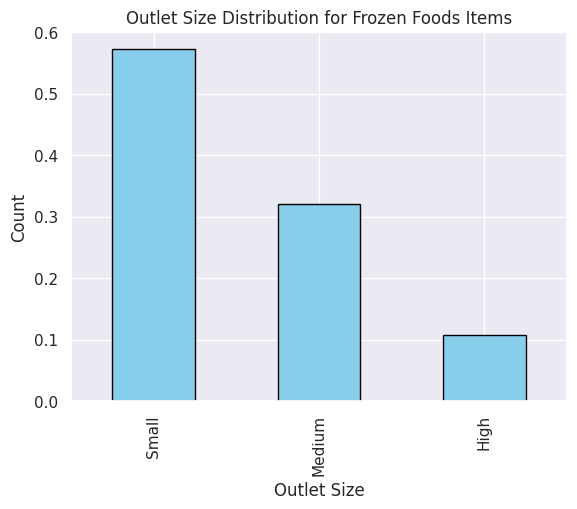

In [71]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Frozen Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Frozen Foods Items')

# Display the plot
plt.show()

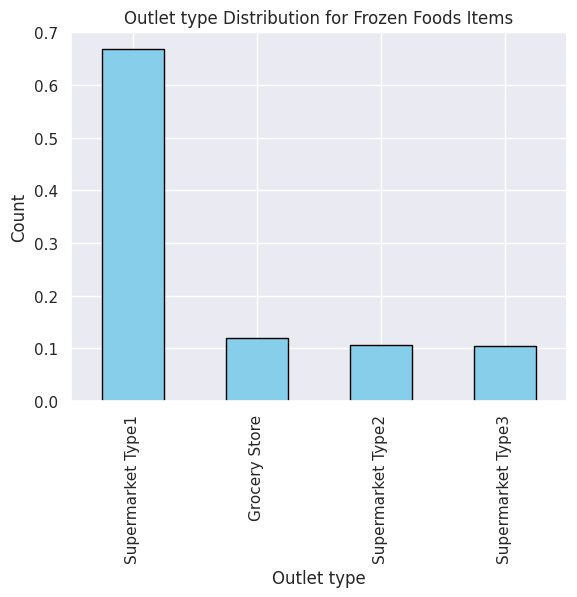

In [72]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Frozen Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Frozen Foods Items')

# Display the plot
plt.show()

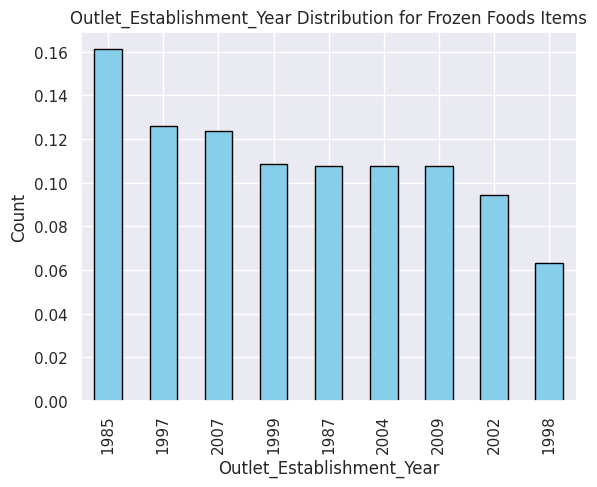

In [73]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Frozen Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Frozen Foods Items')

# Display the plot
plt.show()

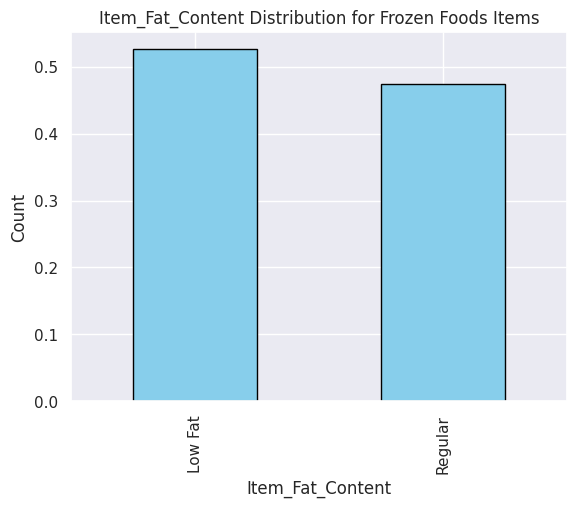

In [74]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Frozen Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Frozen Foods Items')

# Display the plot
plt.show()

9. Breakfast

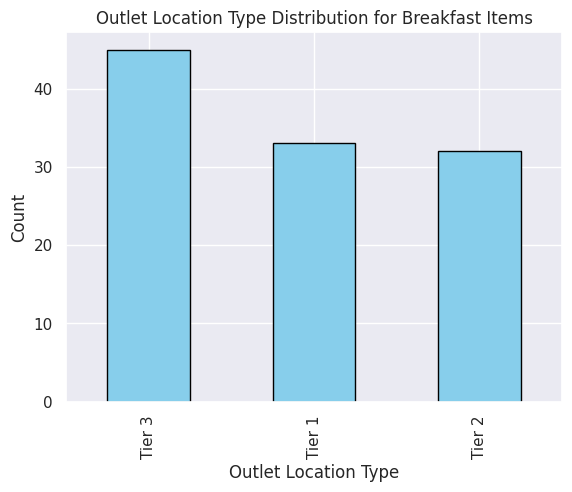

In [75]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Breakfast"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Breakfast Items')

# Display the plot
plt.show()

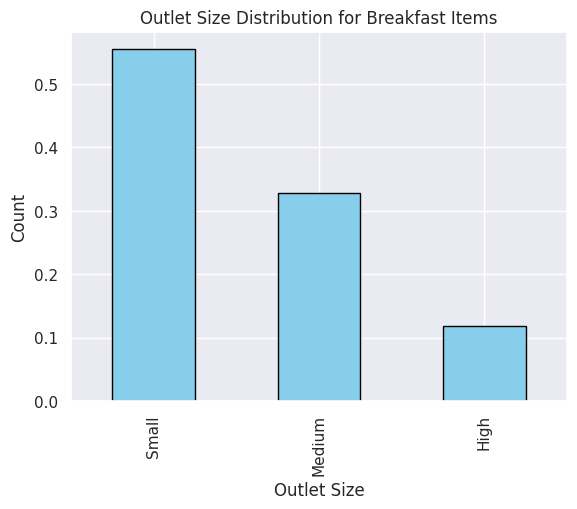

In [76]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Breakfast"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Breakfast Items')

# Display the plot
plt.show()

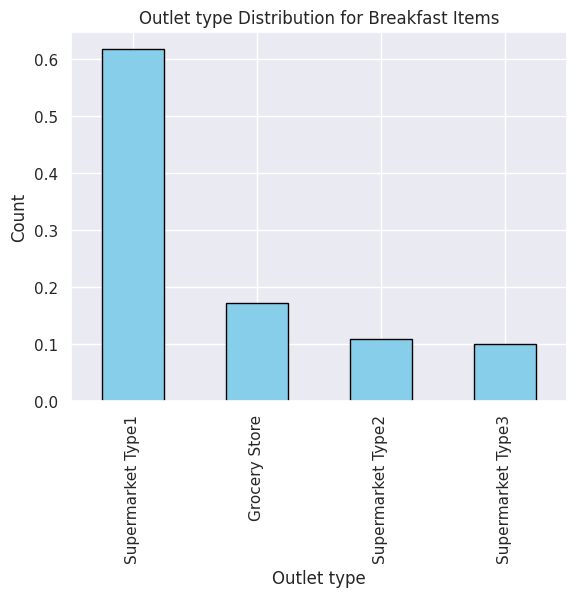

In [77]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Breakfast"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Breakfast Items')

# Display the plot
plt.show()

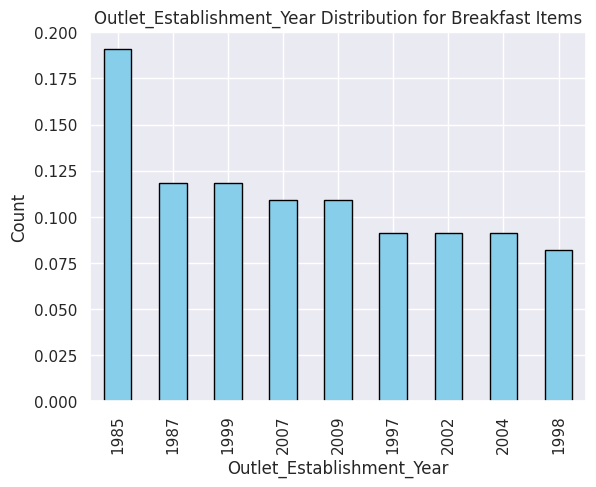

In [78]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Breakfast"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Breakfast Items')

# Display the plot
plt.show()

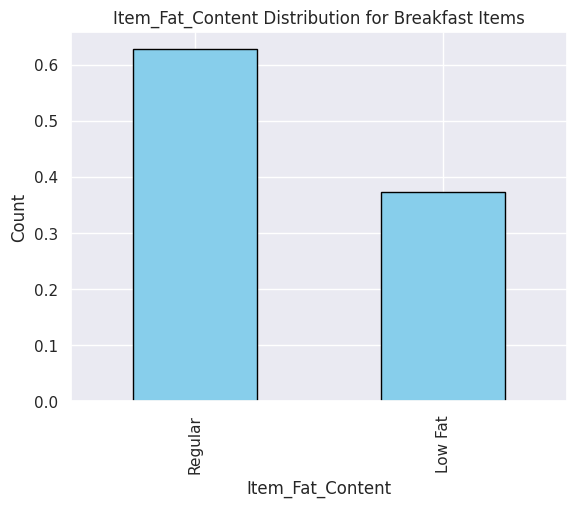

In [79]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Breakfast"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Breakfast Items')

# Display the plot
plt.show()

10. Health and Hygiene

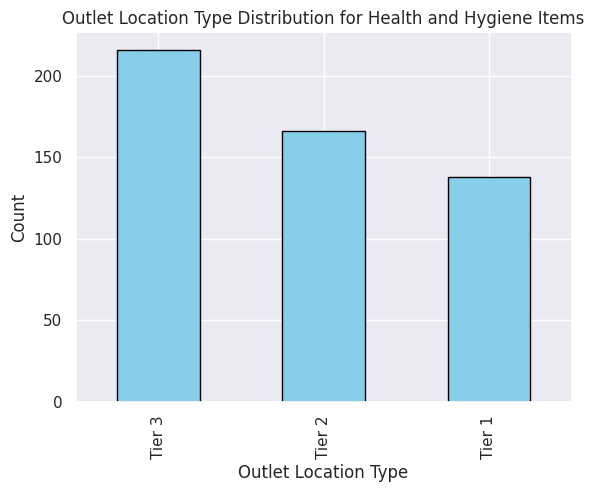

In [80]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Health and Hygiene"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Health and Hygiene Items')

# Display the plot
plt.show()

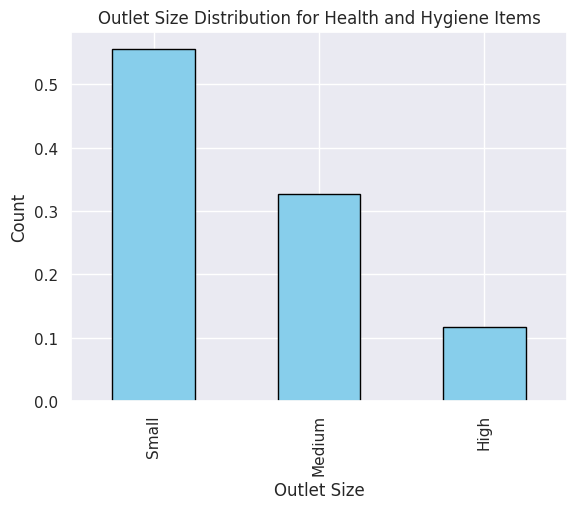

In [81]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Health and Hygiene"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Health and Hygiene Items')

# Display the plot
plt.show()

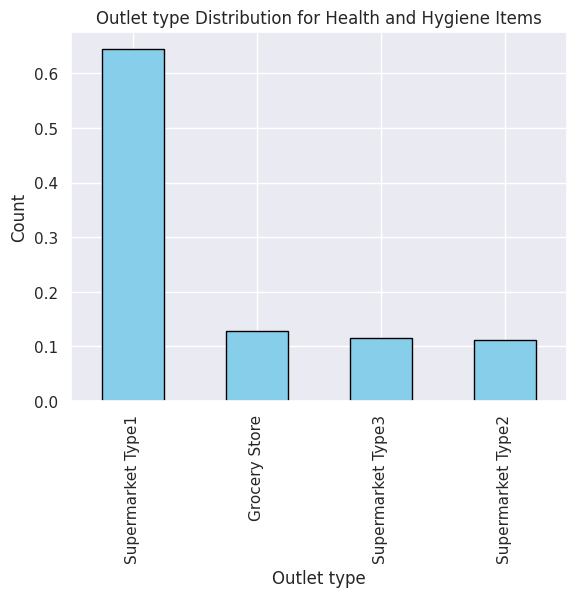

In [82]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Health and Hygiene"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Health and Hygiene Items')

# Display the plot
plt.show()

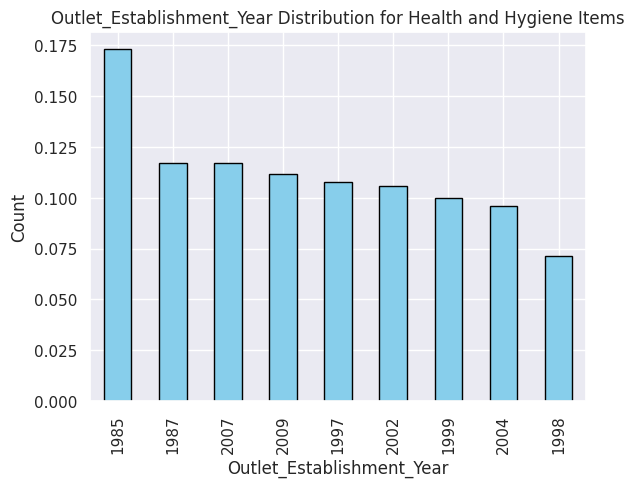

In [83]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Health and Hygiene"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Health and Hygiene Items')

# Display the plot
plt.show()

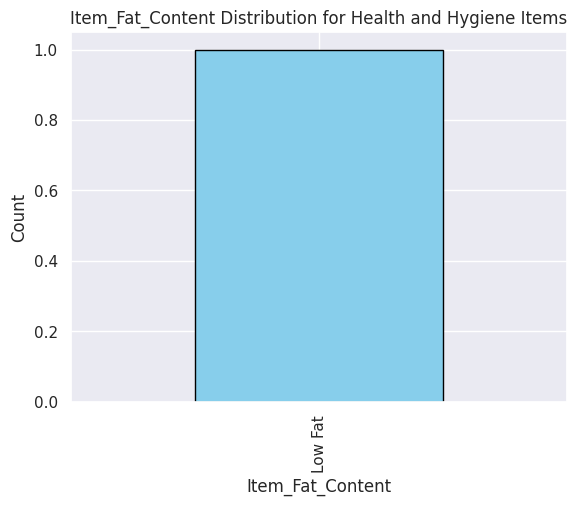

In [84]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Health and Hygiene"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Health and Hygiene Items')

# Display the plot
plt.show()

11. Hard Drinks

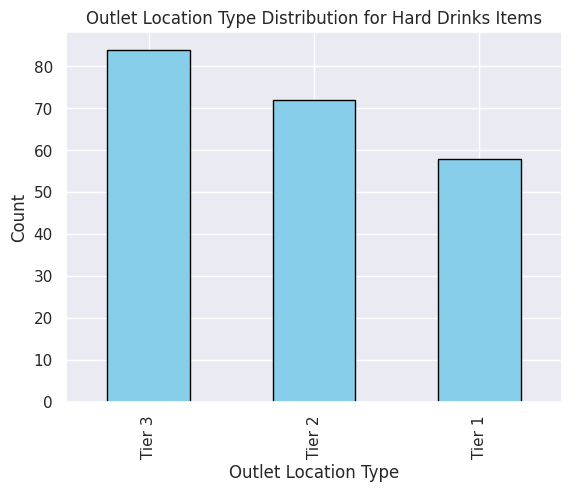

In [85]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Hard Drinks"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Hard Drinks Items')

# Display the plot
plt.show()

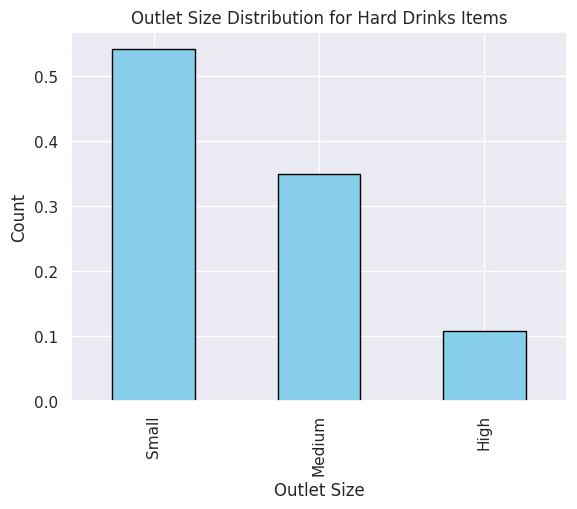

In [86]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Hard Drinks"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Hard Drinks Items')

# Display the plot
plt.show()

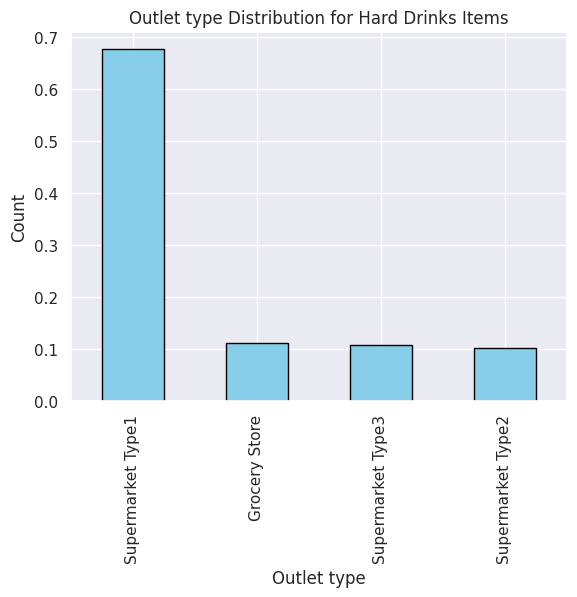

In [87]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Hard Drinks"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Hard Drinks Items')

# Display the plot
plt.show()

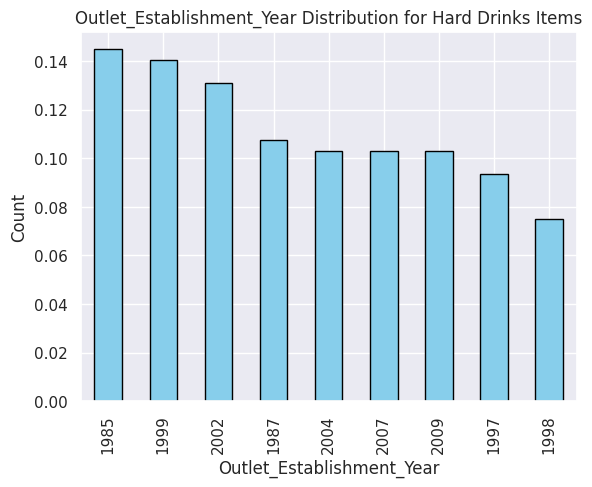

In [88]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Hard Drinks"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Hard Drinks Items')

# Display the plot
plt.show()

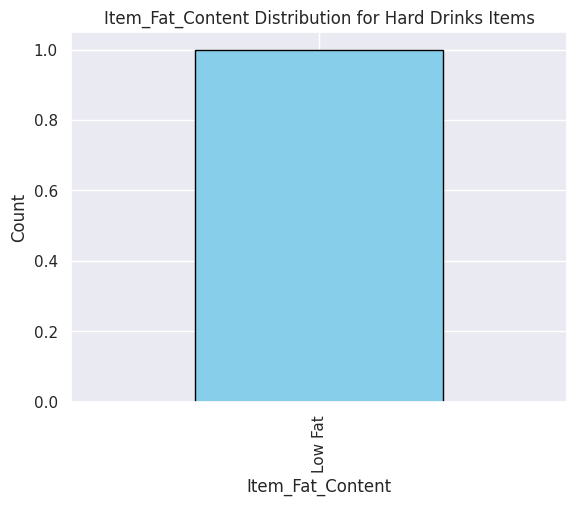

In [89]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Hard Drinks"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Hard Drinks Items')

# Display the plot
plt.show()

12. Canned

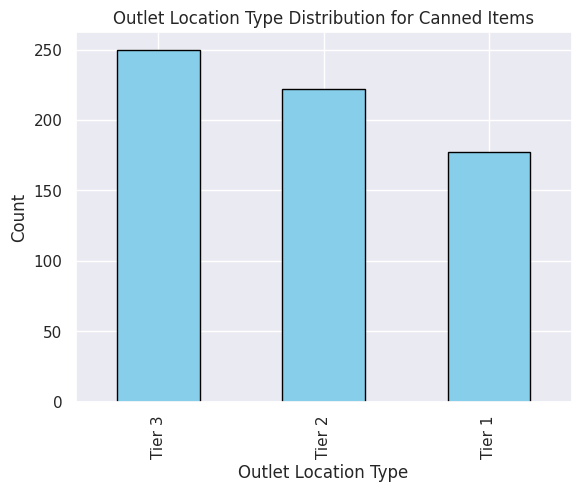

In [90]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Canned"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Canned Items')

# Display the plot
plt.show()

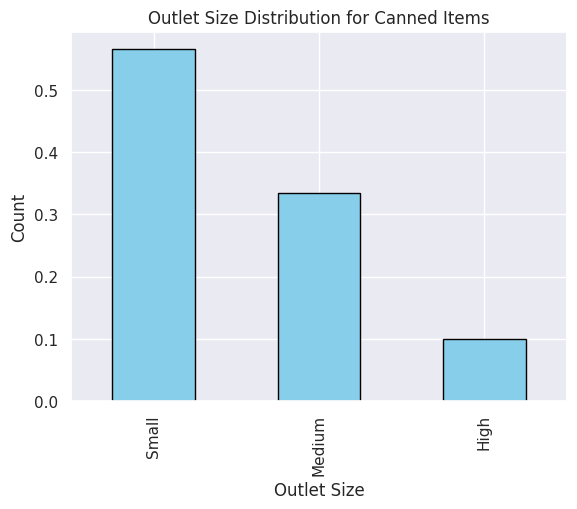

In [91]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Canned"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Canned Items')

# Display the plot
plt.show()


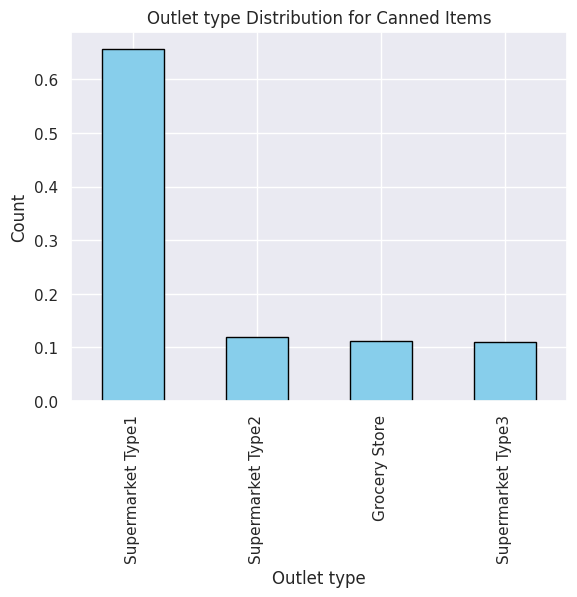

In [92]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Canned"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Canned Items')

# Display the plot
plt.show()

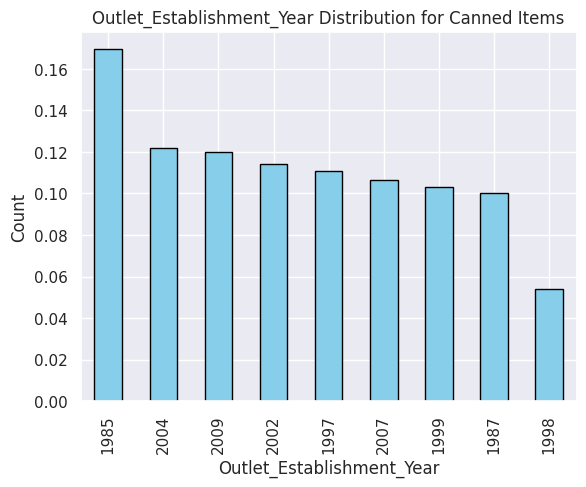

In [93]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Canned"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Canned Items')

# Display the plot
plt.show()


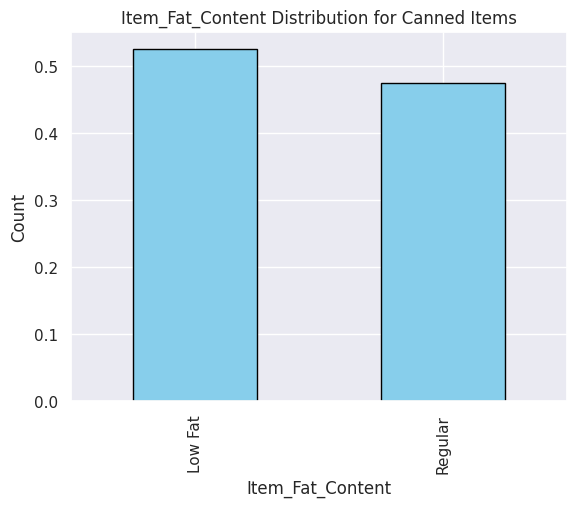

In [94]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Canned"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Canned Items')

# Display the plot
plt.show()

13. Breads

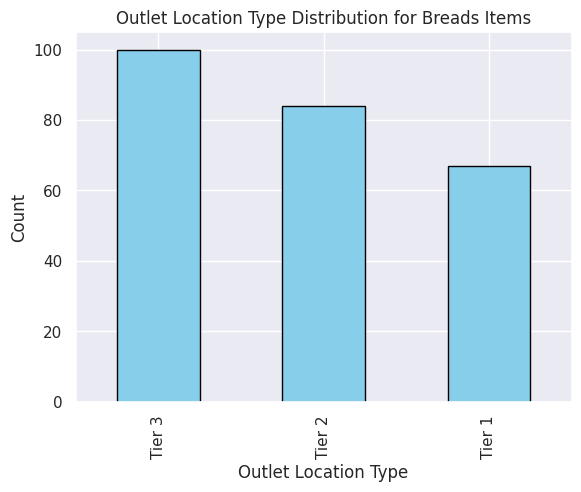

In [95]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Breads"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Breads Items')

# Display the plot
plt.show()

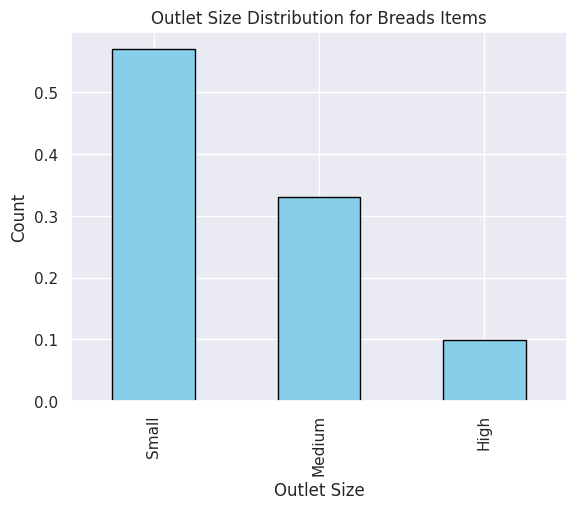

In [96]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Breads"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Breads Items')

# Display the plot
plt.show()

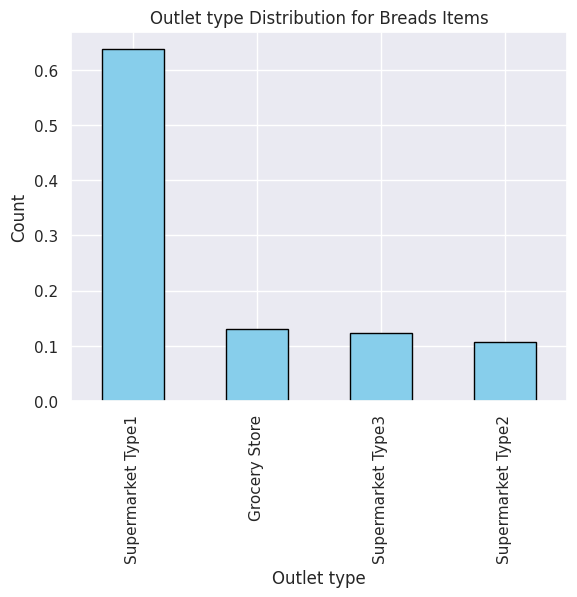

In [97]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Breads"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Breads Items')

# Display the plot
plt.show()

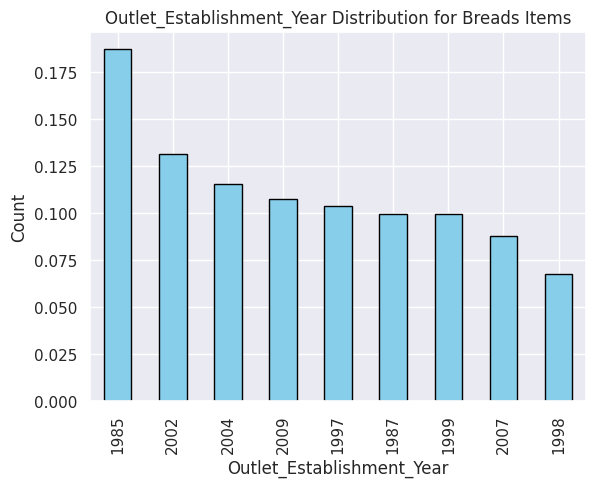

In [98]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Breads"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Breads Items')

# Display the plot
plt.show()

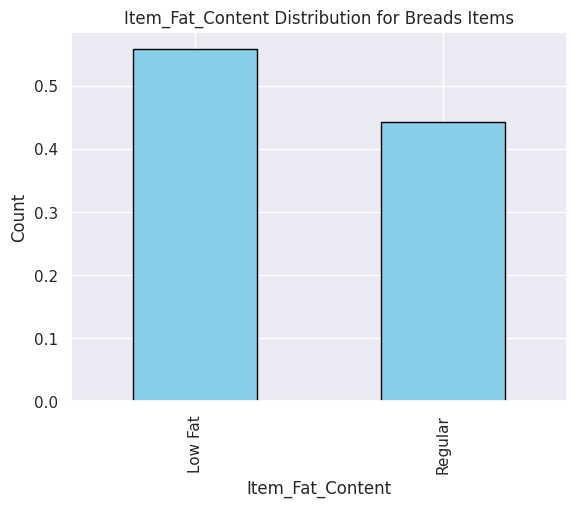

In [99]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Breads"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Breads Items')

# Display the plot
plt.show()

14. Starchy Foods

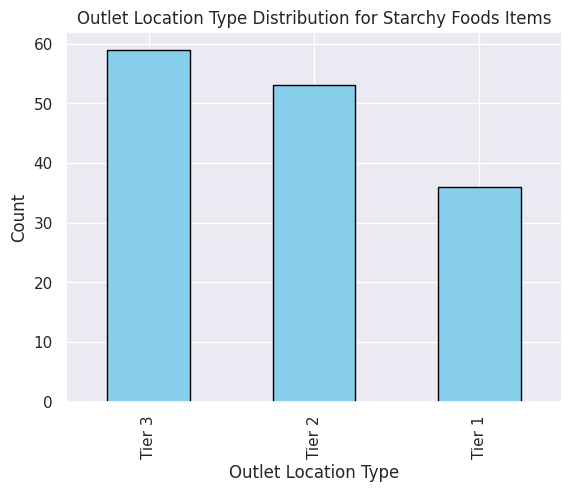

In [100]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Starchy Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Starchy Foods Items')

# Display the plot
plt.show()

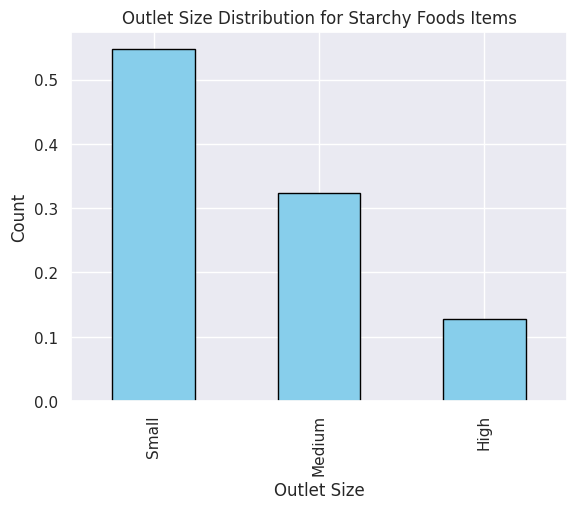

In [101]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Starchy Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Starchy Foods Items')

# Display the plot
plt.show()

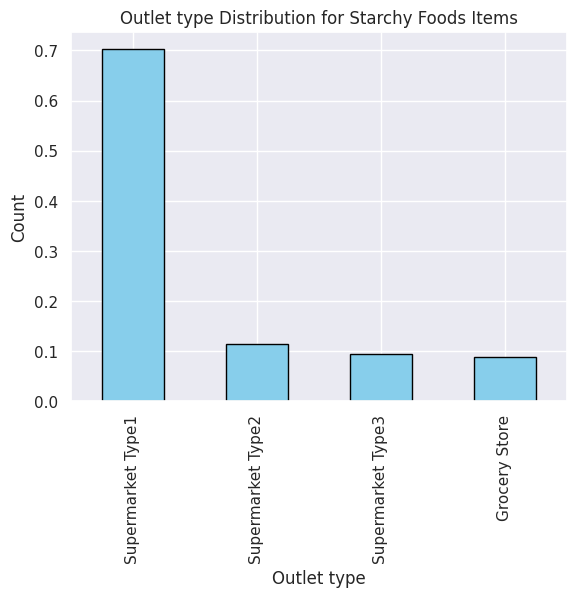

In [102]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Starchy Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Starchy Foods Items')

# Display the plot
plt.show()

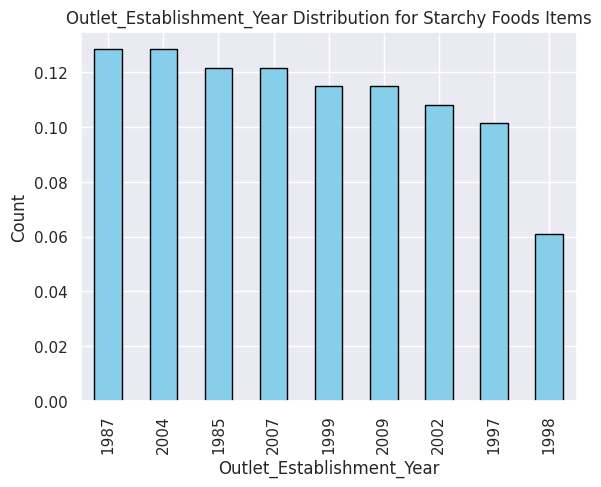

In [103]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Starchy Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Starchy Foods Items')

# Display the plot
plt.show()

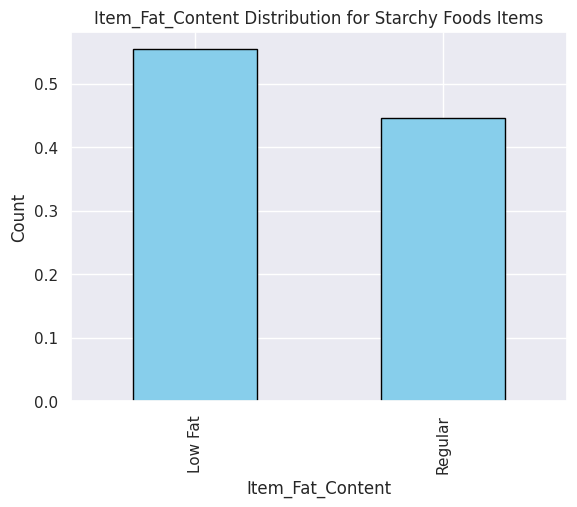

In [104]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Starchy Foods"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Starchy Foods Items')

# Display the plot
plt.show()

15. Seafood

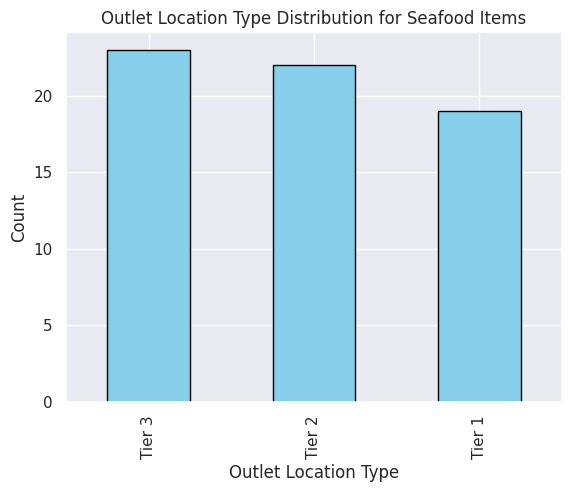

In [105]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Seafood"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Seafood Items')

# Display the plot
plt.show()

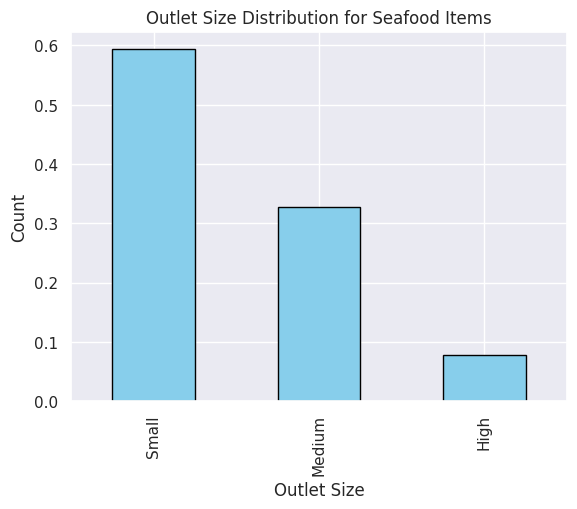

In [106]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Seafood"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Seafood Items')

# Display the plot
plt.show()

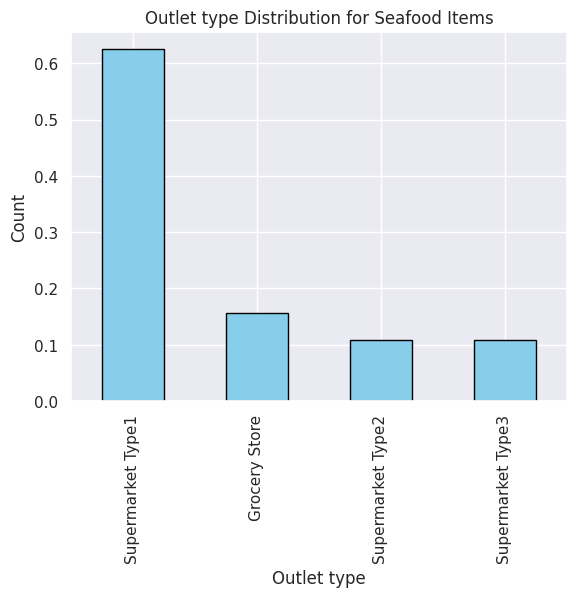

In [107]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Seafood"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Seafood Items')

# Display the plot
plt.show()

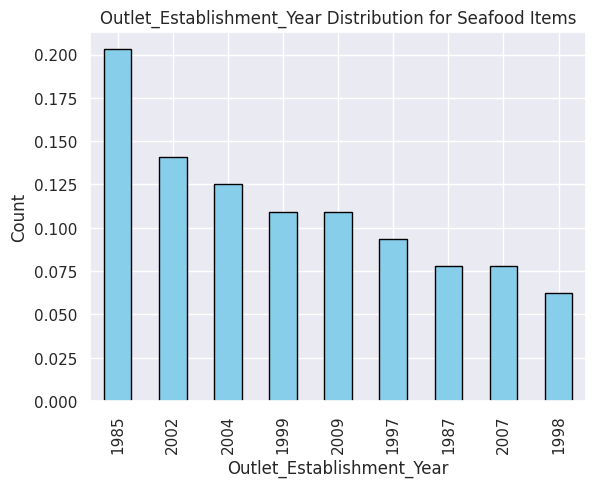

In [108]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Seafood"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Seafood Items')

# Display the plot
plt.show()

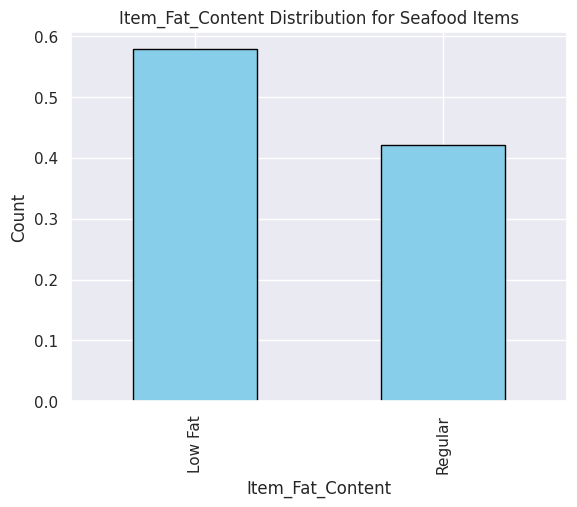

In [109]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Seafood"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Seafood Items')

# Display the plot
plt.show()

16. Others

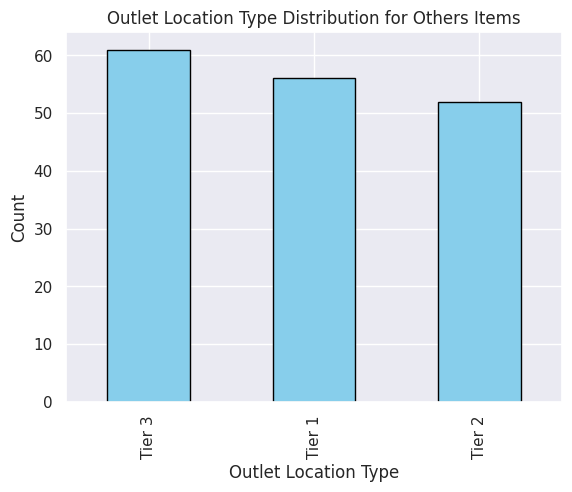

In [110]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Location_Type"].value_counts().loc["Others"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Location Type')
plt.ylabel('Count')
plt.title('Outlet Location Type Distribution for Others Items')

# Display the plot
plt.show()

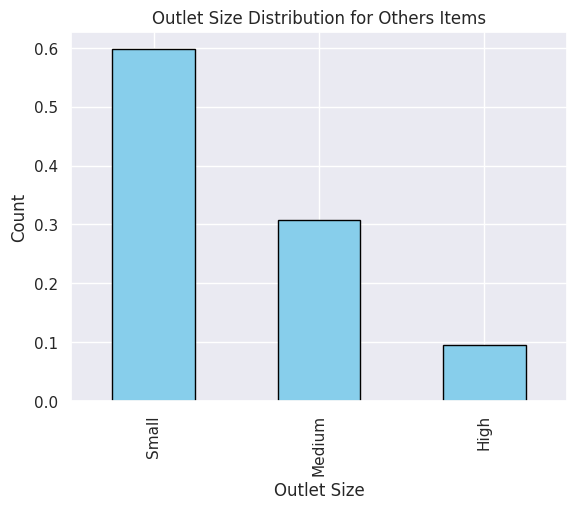

In [111]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Size"].value_counts(normalize=True).loc["Others"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet Size')
plt.ylabel('Count')
plt.title('Outlet Size Distribution for Others Items')

# Display the plot
plt.show()

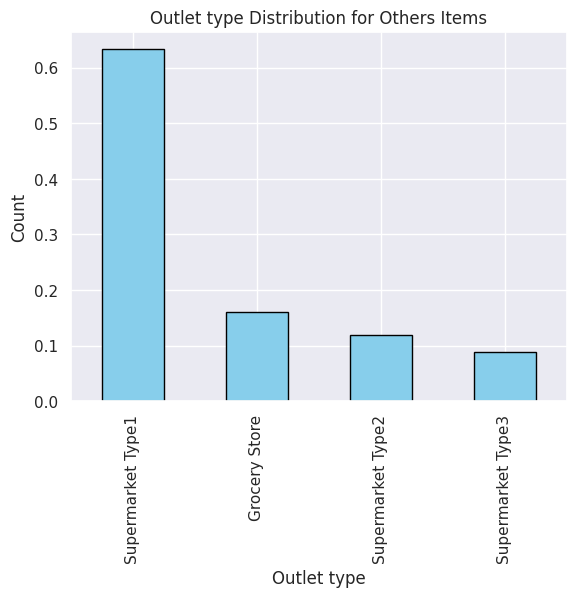

In [112]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Type"].value_counts(normalize=True).loc["Others"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet type')
plt.ylabel('Count')
plt.title('Outlet type Distribution for Others Items')

# Display the plot
plt.show()

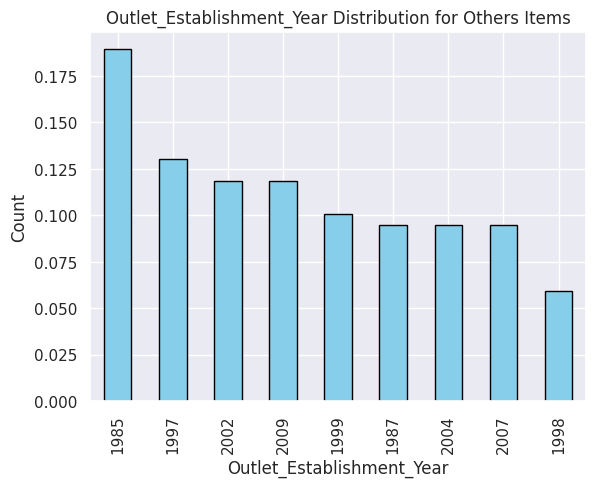

In [113]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Outlet_Establishment_Year"].value_counts(normalize=True).loc["Others"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Count')
plt.title('Outlet_Establishment_Year Distribution for Others Items')

# Display the plot
plt.show()

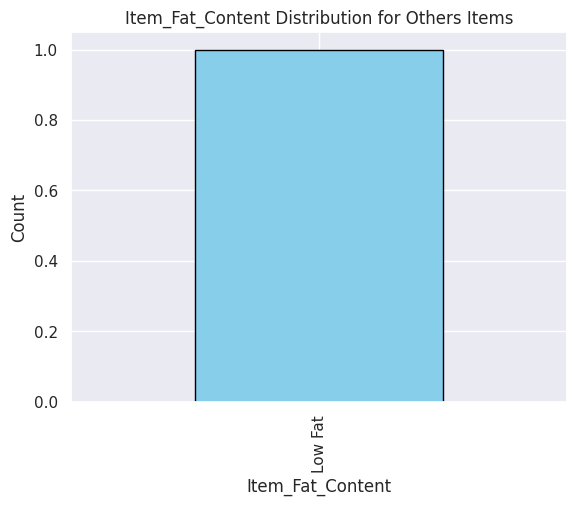

In [114]:
item_type_group = df.groupby(df["Item_Type"])
dairy_group = item_type_group["Item_Fat_Content"].value_counts(normalize=True).loc["Others"]

#from this we can interpret that most of the dairy sales come from teir_3 stores

# Plotting the data
dairy_group.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Item_Fat_Content')
plt.ylabel('Count')
plt.title('Item_Fat_Content Distribution for Others Items')

# Display the plot
plt.show()

LABEL ENCODING

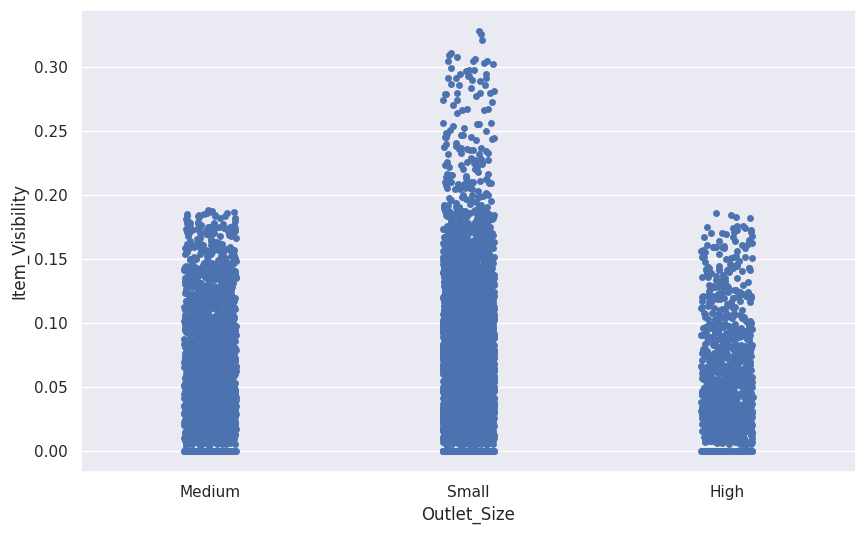

In [115]:
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Outlet_Size', y='Item_Visibility',data = df)
plt.show()

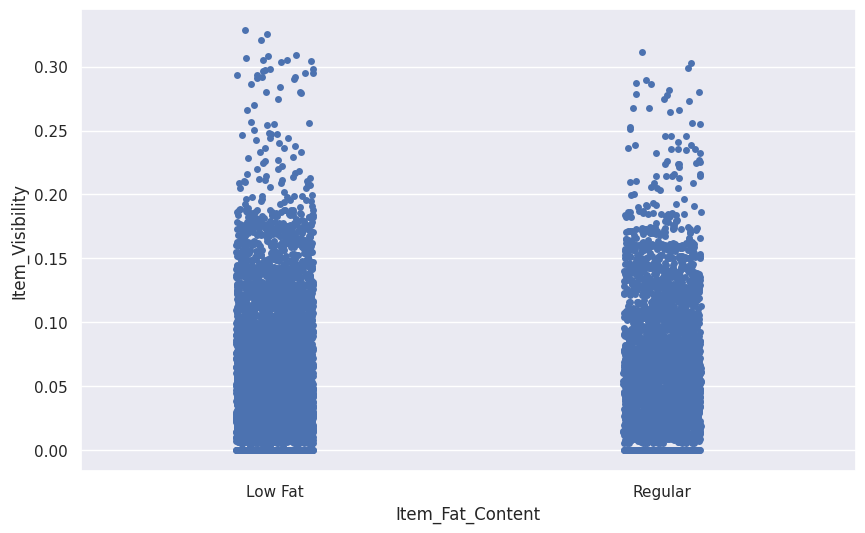

In [116]:
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Item_Fat_Content', y='Item_Visibility',data = df)
plt.show()

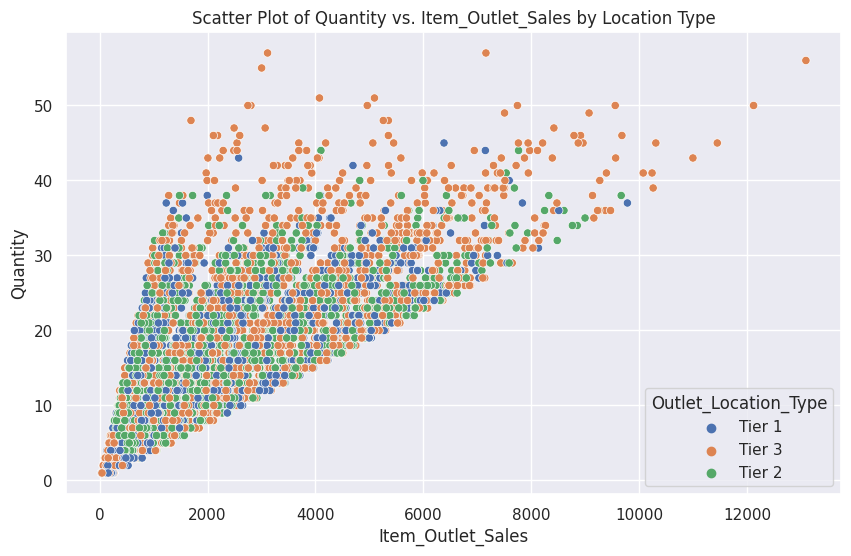

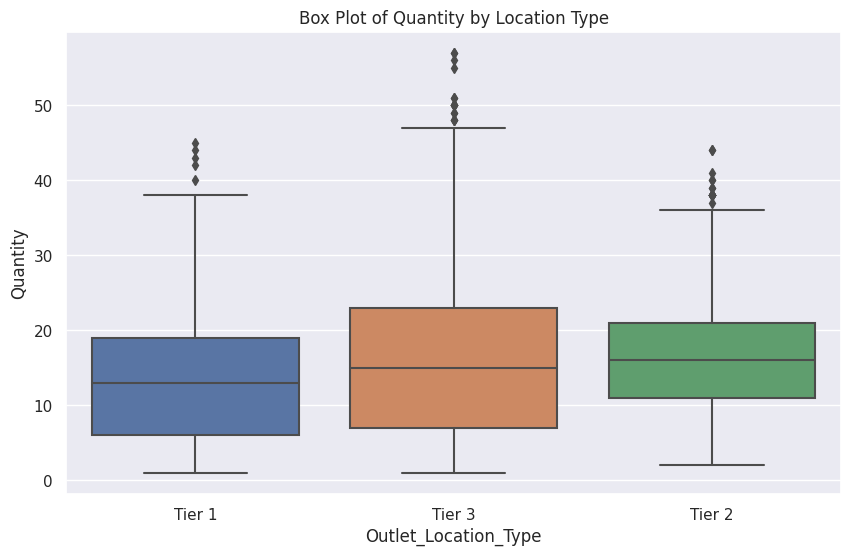

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of Quantity vs. Item_Outlet_Sales colored by Outlet_Location_Type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Outlet_Sales', y='Quantity', hue='Outlet_Location_Type', data=df)
plt.title('Scatter Plot of Quantity vs. Item_Outlet_Sales by Location Type')
plt.xlabel('Item_Outlet_Sales')
plt.ylabel('Quantity')
plt.show()

# Box plot of Quantity by Outlet_Location_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Location_Type', y='Quantity', data=df)  # Fix the syntax here
plt.title('Box Plot of Quantity by Location Type')
plt.xlabel('Outlet_Location_Type')
plt.ylabel('Quantity')
plt.show()



The scatter plot shows how 'Quantity' and 'Item_Outlet_Sales' vary across different locations, with each location type represented by a different color.
The box plot provides a summary of the distribution of 'Quantity' for each 'Outlet_Location_Type'.


MACHINE LEARNING MODEL TRAINING


"The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales."

In [118]:
dairy_df = df[df["Item_Type"]=="Dairy"]
dairy_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Quantity,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,15,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
11,FDA03,18.500,Regular,0.045464,Dairy,15,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
19,FDU02,13.350,Low Fat,0.102492,Dairy,12,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
28,FDE51,5.925,Regular,0.161467,Dairy,4,45.5086,OUT010,1998,Small,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,3,55.7956,OUT010,1998,Small,Tier 3,Grocery Store,163.7868


In [119]:
bin_df = pd.get_dummies(df,columns = ["Outlet_Size","Outlet_Location_Type","Outlet_Type","Item_Fat_Content"])
new_df = bin_df.drop(["Outlet_Size_Small","Outlet_Location_Type_Tier 3","Outlet_Type_Supermarket Type3","Item_Fat_Content_Regular","Item_Identifier","Item_Type","Outlet_Identifier","Outlet_Establishment_Year","Item_Outlet_Sales","Quantity"],axis=1)
new_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size_High,Outlet_Size_Medium,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Item_Fat_Content_Low Fat
0,9.30,0.016047,249.8092,0,1,1,0,0,1,0,1
1,5.92,0.019278,48.2692,0,1,0,0,0,0,1,0
2,17.50,0.016760,141.6180,0,1,1,0,0,1,0,1
3,19.20,0.000000,182.0950,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,1,0,0,0,0,1,0,1


Prediction(Regression Analysis)


---



In [120]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso

x = new_df.iloc[:, :]
y = df["Item_Outlet_Sales"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=30)

models = {
    "r_forest": {"model": RandomForestRegressor(),
                 "param": {'n_estimators': [50, 100, 200],
                           'min_samples_leaf':[2,5,10],
                           'max_depth': [None, 10, 20]}},
    "ridge": {"model": Ridge(),
                 "param": {'alpha': [0.1,1,10]}},
    "lasso": {"model": Lasso(),
                 "param": {'alpha': [0.1,1,10]}},
    "svm": {"model": SVR(),
            "param": {'C': [0.1, 1, 10],
                      'kernel': ['linear', 'rbf', 'poly']}},
    "linear_regression": {"model": LinearRegression(),
                          "param": {'fit_intercept': [True, False]}}
}

kf = KFold(n_splits=8, shuffle=True, random_state=30)

for model_name, model_info in models.items():
    print(f"Performing grid search for {model_name}...")

    specific_model = model_info["model"]
    param_grid = model_info["param"]

    grid_search = GridSearchCV(specific_model, param_grid, cv=kf, scoring='neg_mean_squared_error')
    grid_search.fit(x_train, y_train)

    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print()


Performing grid search for r_forest...
Best Parameters for r_forest: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 200}

Performing grid search for ridge...
Best Parameters for ridge: {'alpha': 1}

Performing grid search for lasso...
Best Parameters for lasso: {'alpha': 1}

Performing grid search for svm...
Best Parameters for svm: {'C': 10, 'kernel': 'linear'}

Performing grid search for linear_regression...
Best Parameters for linear_regression: {'fit_intercept': True}



the predicted sales are: [2050.52058284 1088.03462737 1441.53083159 ... 1799.62482297 1615.84594761
 1966.27001604]
the train score: 0.6748706614581916
the test score: 0.5850932944599547
Mean Absolute Error: 772.8878646588125
Mean Squared Error: 1262716.0087491495
R-squared: 0.5850932944599547


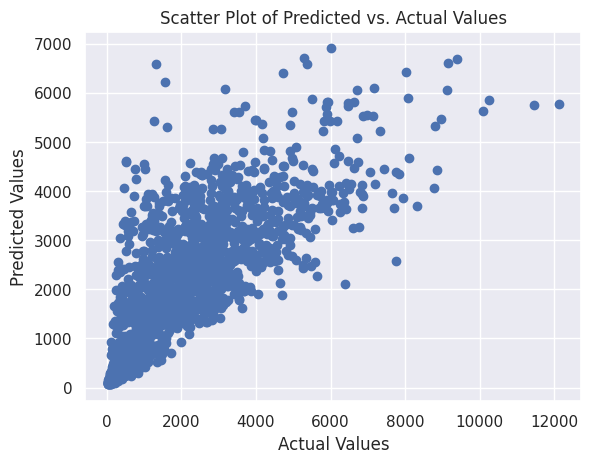

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = RandomForestRegressor(n_estimators=200,min_samples_leaf=10,max_depth=10)
model.fit(x_train,y_train)
# input_str = input("Enter array elements separated by spaces: ")
# my_array = [int(x) if '.' not in x else float(x) for x in input_str.split()]
# input_array = [my_array]
y_pred = model.predict(x_test)
print("the predicted sales are:",y_pred)
train_score = model.score(x_train,y_train)
print("the train score:",train_score)
test_score = model.score(x_test,y_test)
print("the test score:",test_score)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:',mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.show()

the predicted sales are: [2784.8964775  2157.78655374 1563.92713437 ... 1869.19988395 1665.93530778
 2145.36366988]
the train score: 0.5642147350522887
the test score: 0.555021447347398
Mean Absolute Error: 853.7322878279466
Mean Squared Error: 1354235.866718804
R-squared: 0.555021447347398


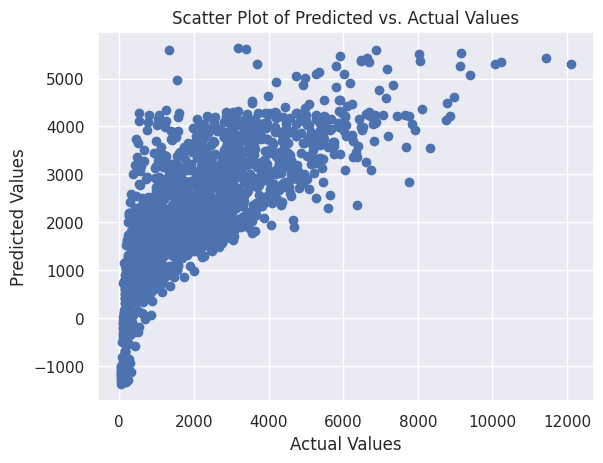

In [122]:
model_1 = LinearRegression(fit_intercept=True)
model_1.fit(x_train,y_train)
y_pred = model_1.predict(x_test)
print("the predicted sales are:",y_pred)
train_score = model_1.score(x_train,y_train)
print("the train score:",train_score)
test_score = model_1.score(x_test,y_test)
print("the test score:",test_score)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:',mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.show()


the predicted sales are: [1973.85610448 1383.06399665 1711.03790644 ... 1864.90624149 1768.53050412
 2016.80864565]
the train score: 0.523358811102675
the test score: 0.513071711196759
Mean Absolute Error: 864.8390537829655
Mean Squared Error: 1481904.5755946173
R-squared: 0.513071711196759


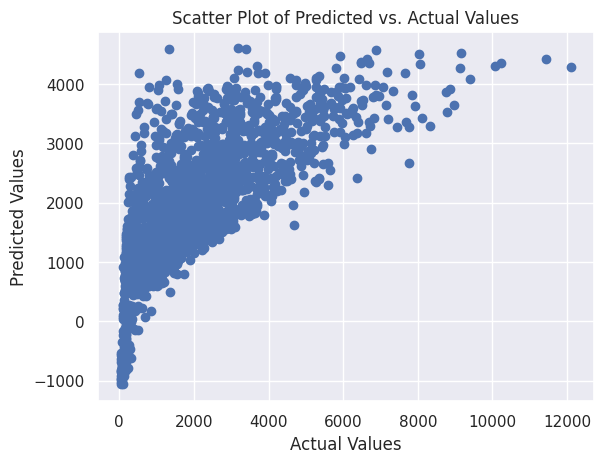

In [126]:
model_2 = SVR(C=10,kernel='linear',gamma=0.1)
model_2.fit(x_train,y_train)

y_pred = model_2.predict(x_test)
print("the predicted sales are:",y_pred)
train_score = model_2.score(x_train,y_train)
print("the train score:",train_score)
test_score = model_2.score(x_test,y_test)
print("the test score:",test_score)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:',mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.show()



the predicted sales are: [2777.17325421 2149.08722917 1571.27112993 ... 1871.19259658 1672.31777618
 2145.75192832]
the train score: 0.5642067079262818
the test score: 0.5550383841570306
Mean Absolute Error: 853.6260570709347
Mean Squared Error: 1354184.3216838008
R-squared: 0.5550383841570306


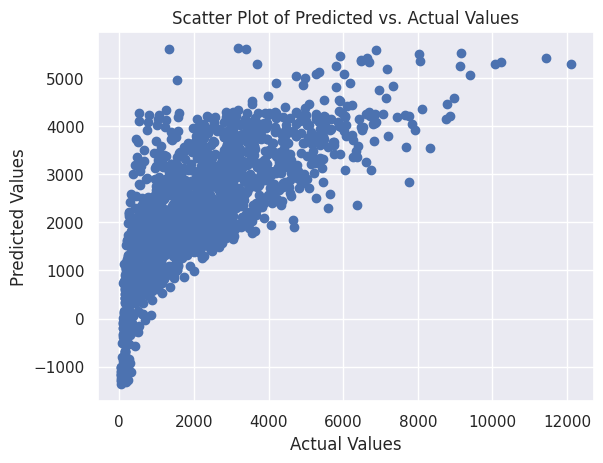

In [124]:
model_3 = Ridge(alpha=1)
model_3.fit(x_train,y_train)
y_pred = model_3.predict(x_test)
print("the predicted sales are:",y_pred)
train_score = model_3.score(x_train,y_train)
print("the train score:",train_score)
test_score = model_3.score(x_test,y_test)
print("the test score:",test_score)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:',mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.show()


the predicted sales are: [2780.69341479 2124.69995266 1606.82991722 ... 1873.38795457 1681.69987647
 2151.95863002]
the train score: 0.5640592835050008
the test score: 0.5546496884468269
Mean Absolute Error: 853.4163919958881
Mean Squared Error: 1355367.267847969
R-squared: 0.5546496884468269


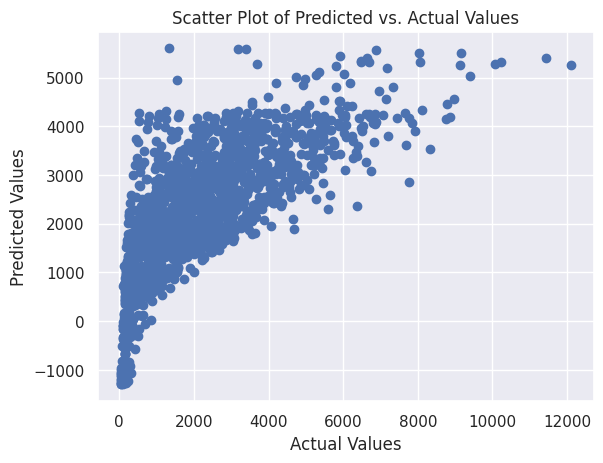

In [125]:
model_4 = Lasso(alpha=1)
model_4.fit(x_train,y_train)
y_pred = model_4.predict(x_test)
print("the predicted sales are:",y_pred)
train_score = model_4.score(x_train,y_train)
print("the train score:",train_score)
test_score = model_4.score(x_test,y_test)
print("the test score:",test_score)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:',mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.show()